### Importing necessary libraries and loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 122)
pd.set_option('display.max_rows', 150)

In [3]:
df = pd.read_csv(r'application_data.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
df1 = df.copy()

### Reducing memory usage by dataframes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
# Refrence - https://www.kaggle.com/gemartin/load-data-reduce-memory-usage

# Other references - 
# 1. https://www.analyticsvidhya.com/blog/2021/04/how-to-reduce-memory-usage-in-python-pandas/#:~:text=This%20can%20reduce%20memory%20usage,to%20the%20range%20of%20values.
# 2. https://www.geeksforgeeks.org/pandas-memory-management/#:~:text=Memory_usage()%3A,labels%20present%20in%20the%20Index.&text=However%2C%20Info()%20only%20gives,of%20each%20column%20in%20bytes.

def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('object')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df
df = reduce_mem_usage(df)

Memory usage of dataframe is 286.23 MB
Memory usage after optimization is: 92.38 MB
Decreased by 67.7%


### Data Summary

In [7]:
df.shape

(307511, 122)

In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int32  
 1    TARGET                        int8   
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int8   
 7    AMT_INCOME_TOTAL              float32
 8    AMT_CREDIT                    float32
 9    AMT_ANNUITY                   float32
 10   AMT_GOODS_PRICE               float32
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float16
 17   DAYS_BIRTH                    int16  
 18   DA

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168739.093750,237175.921875,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,598830.812500,402479.531250,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27110.958984,14493.233398,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,537979.625000,369542.656250,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020859,0.013824,2.899170e-04,0.010010,0.018845,0.028656,7.250977e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


In [10]:
# get the count, size and Unique value in each column of application data
df.agg(['count','size','nunique'])

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307499,307233,306219,307511,307511,307511,307511,307511,307511,307511,307511,307511,104582,307511,307511,307511,307511,307511,307511,211120,307509,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,134133,306851,246546,151450,127568,157504,103023,92646,143620,152683,154491,98869,124921,97312,153161,93997,137829,151450,127568,157504,103023,92646,143620,152683,154491,98869,124921,97312,153161,93997,137829,151450,127568,157504,103023,92646,143620,152683,154491,98869,124921,97312,153161,93997,137829,97216,153214,159080,151170,161756,306490,306490,306490,306490,307510,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,265992,265992,265992,265992,265992,265992
size,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
nunique,307511,2,2,3,2,2,15,2548,5603,13672,1002,7,8,5,6,6,81,17460,12574,5282,6168,62,2,2,2

### Checking for duplicate records and null values

In [11]:
df[df.duplicated()] 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum().sum()

9152465

In [14]:
df.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [15]:
round(100*(df.isnull().sum()/len(df)),2).sort_values(ascending=False)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

<AxesSubplot:>

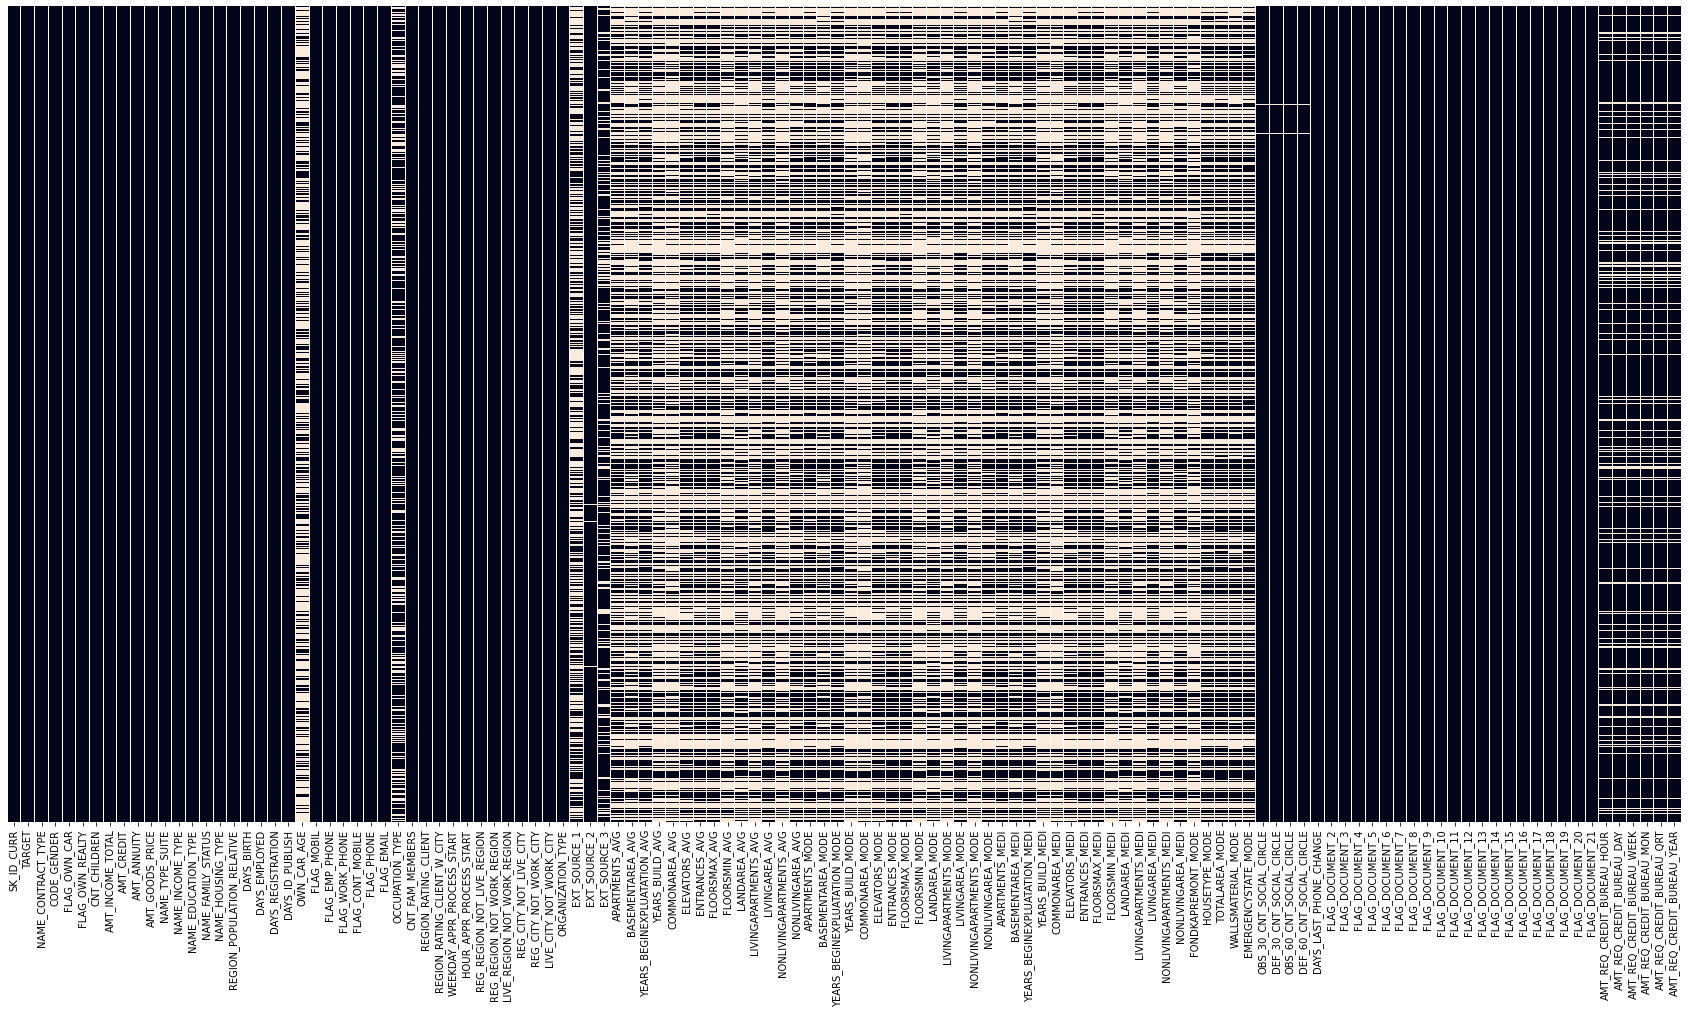

In [16]:
plt.figure(figsize = (30,15))   # For adjusting size of heat map, ref = https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn

sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

### Distribution of TARGET variable

In [17]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [18]:
defaulters = df[df['TARGET']==1]
nondefaulters = df[df['TARGET']==0]

In [19]:
percentage_defaulters = (len(defaulters)*100)/len(df)
percentage_nondefaulters = (len(nondefaulters)*100)/len(df)

print("The Percentage of people who have paid their loan is:", round(percentage_nondefaulters,2),"%")
print("The Percentage of people who have NOT paid their loan is:", round(percentage_defaulters,2),"%")
print("The Ratio of Data Imbalance is:", round(len(nondefaulters)/len(defaulters),2))

The Percentage of people who have paid their loan is: 91.93 %
The Percentage of people who have NOT paid their loan is: 8.07 %
The Ratio of Data Imbalance is: 11.39


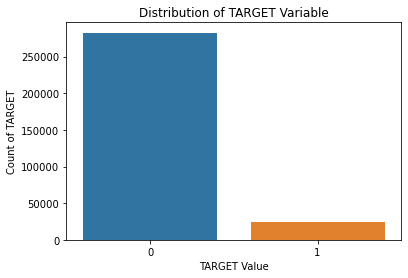

In [20]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

sns.countplot(df['TARGET'])
plt.xlabel("TARGET Value")
plt.ylabel("Count of TARGET")
plt.title("Distribution of TARGET Variable")
plt.show()

#### Conclusion - There are far more loans that were repaid on time than loans that were not repaid. More than 25000 loans were repaid, less than 5000 loans were not repaid.

In [21]:
try:
    for col in [col for col in df1.columns if 'AVG' in col]+[col for col in df1.columns if 'MEDI' in col]+[col for col in df1.columns if 'MODE' in col]:
        print(col, ' --------- ', df1['TARGET'].corr(df1[col]))
except TypeError:
    pass

APARTMENTS_AVG  ---------  -0.029497564633431526
BASEMENTAREA_AVG  ---------  -0.02274574319014809
YEARS_BEGINEXPLUATATION_AVG  ---------  -0.009727673268680109
YEARS_BUILD_AVG  ---------  -0.02214928406338873
COMMONAREA_AVG  ---------  -0.018549661629760336
ELEVATORS_AVG  ---------  -0.03419879367526815
ENTRANCES_AVG  ---------  -0.019172182012738237
FLOORSMAX_AVG  ---------  -0.04400337053240212
FLOORSMIN_AVG  ---------  -0.033613503251899934
LANDAREA_AVG  ---------  -0.010884822678806654
LIVINGAPARTMENTS_AVG  ---------  -0.02503053329106433
LIVINGAREA_AVG  ---------  -0.03299711746761156
NONLIVINGAPARTMENTS_AVG  ---------  -0.0031761075207261385
NONLIVINGAREA_AVG  ---------  -0.01357806978198486
APARTMENTS_MEDI  ---------  -0.02918375887669348
BASEMENTAREA_MEDI  ---------  -0.022081261373189928
YEARS_BEGINEXPLUATATION_MEDI  ---------  -0.00999309655969653
YEARS_BUILD_MEDI  ---------  -0.022325926477474348
COMMONAREA_MEDI  ---------  -0.0185728689077109
ELEVATORS_MEDI  ---------  -0.

## Making 1 column out of multiple columns

### Mean (avg) columns

In [22]:
AVG_cols = [col for col in df.columns if 'AVG' in col]
AVG_cols

['APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG']

In [23]:
# float16 was giving problems (mean and sum as nan), so converting them to float64
df['YEARS_BEGINEXPLUATATION_AVG'] = df['YEARS_BEGINEXPLUATATION_AVG'].astype(np.float64)
df['YEARS_BUILD_AVG'] = df['YEARS_BUILD_AVG'].astype(np.float64)

In [24]:
avg_summary = pd.DataFrame(columns=['col_name', 'null_sum', 'mean', 'median'])
for col in AVG_cols:
    #print(col, "    ", df[col].isnull().sum(), "    ", df[col].mean(), "    ", df[col].median())
    avg_summary = avg_summary.append({'col_name': col, 
                                    'null_sum': df[col].isnull().sum(), 
                                    'mean': df[col].mean(), 
                                    'median': df[col].median()}, ignore_index=True)
avg_summary

,col_name,null_sum,mean,median
0,APARTMENTS_AVG,156061,0.117493,0.087585
1,BASEMENTAREA_AVG,179943,0.088440,0.076294
2,YEARS_BEGINEXPLUATATION_AVG,150007,0.977716,0.981445
3,YEARS_BUILD_AVG,204488,0.752477,0.755371
4,COMMONAREA_AVG,214865,0.044647,0.021103
5,ELEVATORS_AVG,163891,0.078918,0.000000
6,ENTRANCES_AVG,154828,0.149536,0.137939
7,FLOORSMAX_AVG,153020,0.226440,0.166748
8,FLOORSMIN_AVG,208642,0.232056,0.208252
9,LANDAREA_AVG,182590,0.066345,0.048096


In [25]:
for col in AVG_cols:
    df[col].fillna(df[col].mean(), inplace=True)

In [26]:
avg_df = df[AVG_cols]
avg_df.head()

,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG
0,0.024704,0.036896,0.972168,0.619141,0.014297,0.000000,0.068970,0.083313,0.125000,0.036896,0.020203,0.018997,0.000000,0.000000
1,0.095886,0.052887,0.984863,0.795898,0.060486,0.080017,0.034485,0.291748,0.333252,0.013000,0.077271,0.054901,0.003901,0.009804
2,0.117493,0.088440,0.977716,0.752477,0.044647,0.078918,0.149536,0.226440,0.232056,0.066345,0.100647,0.107361,0.008812,0.028351
3,0.117493,0.088440,0.977716,0.752477,0.044647,0.078918,0.149536,0.226440,0.232056,0.066345,0.100647,0.107361,0.008812,0.028351
4,0.117493,0.088440,0.977716,0.752477,0.044647,0.078918,0.149536,0.226440,0.232056,0.066345,0.100647,0.107361,0.008812,0.028351


In [27]:
df['STD_OF_LIVING_AVG'] = avg_df.mean(axis=1)

In [28]:
df.drop(columns = AVG_cols, inplace=True)

In [29]:
df['TARGET'].corr(df['STD_OF_LIVING_AVG'])

-0.025056725961678808

In [118]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,STD_OF_LIVING_AVG,STD_OF_LIVING_MEDIAN,STD_OF_LIVING_MODE
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010033,-19046,-225,-4260.0,-2531,26.00,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.404053,0.556152,0.729492,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.212803,0.188466,0.252777
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008018,-19005,-3039,-9832.0,-2437,23.75,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.496826,0.650391,0.693359,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.212803,0.188466,0.252777
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028656,-19932,-3038,-4312.0,-3458,21.50,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.589355,0.322754,0.657227,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.212803,0.188466,0.252777
5,100008,0,0,1,0,1,0,99000.0,490495.5,27517.5,454500.0,5,4,4,1,1,0.035797,-16941,-1588,-4968.0,-477,19.25,1,1,1,1,1,0,8,2.0,2,2,6,16,0,0,0,0,0,0,33,0.682129,0.354248,0.621094,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.212803,0.188466,0.252777
6,100009,0,0,0,1,1,1,171000.0,1560726.0,41301.0,1395000.0,6,1,1,1,1,0.035797,-13778,-3130,-1213.0,-619,17.00,1,1,0,1,1,0,0,3.0,2,2,3,16,0,0,0,0,0,0,5,0.774902,0.724121,0.491943,1.0,0.0,1.0,0.0,-1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0,0.212803,0.188466,0.252777


### Median columns

In [30]:
MEDI_cols = [col for col in df.columns if 'MEDI' in col]
MEDI_cols

['APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI']

In [31]:
# float16 was giving problems (mean and sum as nan), so converting them to float64
df['YEARS_BEGINEXPLUATATION_MEDI'] = df['YEARS_BEGINEXPLUATATION_MEDI'].astype(np.float64)
df['YEARS_BUILD_MEDI'] = df['YEARS_BUILD_MEDI'].astype(np.float64)

In [32]:
median_summary = pd.DataFrame(columns=['col_name', 'null_sum', 'mean', 'median'])
for col in MEDI_cols:
    #print(col, "    ", df[col].isnull().sum(), "    ", df[col].mean(), "    ", df[col].median())
    median_summary = median_summary.append({'col_name': col, 
                                    'null_sum': df[col].isnull().sum(), 
                                    'mean': df[col].mean(), 
                                    'median': df[col].median()}, ignore_index=True)
median_summary

,col_name,null_sum,mean,median
0,APARTMENTS_MEDI,156061,0.117676,0.086426
1,BASEMENTAREA_MEDI,179943,0.087952,0.075806
2,YEARS_BEGINEXPLUATATION_MEDI,150007,0.977733,0.981445
3,YEARS_BUILD_MEDI,204488,0.755743,0.758301
4,COMMONAREA_MEDI,214865,0.044586,0.020798
5,ELEVATORS_MEDI,163891,0.078064,0.000000
6,ENTRANCES_MEDI,154828,0.149170,0.137939
7,FLOORSMAX_MEDI,153020,0.225952,0.166748
8,FLOORSMIN_MEDI,208642,0.231934,0.208252
9,LANDAREA_MEDI,182590,0.067261,0.048706


In [33]:
for col in MEDI_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [34]:
median_df = df[MEDI_cols]
median_df.head()

,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI
0,0.024994,0.036896,0.972168,0.624512,0.014397,0.000000,0.068970,0.083313,0.125000,0.037506,0.020493,0.019302,0.000000,0.000000
1,0.096802,0.052887,0.984863,0.798828,0.060791,0.080017,0.034485,0.291748,0.333252,0.013199,0.078674,0.055786,0.003901,0.010002
2,0.086426,0.075806,0.981445,0.758301,0.020798,0.000000,0.137939,0.166748,0.208252,0.048706,0.076111,0.074890,0.000000,0.003099
3,0.086426,0.075806,0.981445,0.758301,0.020798,0.000000,0.137939,0.166748,0.208252,0.048706,0.076111,0.074890,0.000000,0.003099
4,0.086426,0.075806,0.981445,0.758301,0.020798,0.000000,0.137939,0.166748,0.208252,0.048706,0.076111,0.074890,0.000000,0.003099


In [35]:
df['STD_OF_LIVING_MEDIAN'] = median_df.mean(axis=1)

In [36]:
df.drop(columns = MEDI_cols, inplace=True)

In [37]:
df['TARGET'].corr(df['STD_OF_LIVING_MEDIAN'])

-0.034400253797733434

### Mode columns

In [38]:
MODE_cols = [col for col in df.columns if 'MODE' in col]
MODE_cols

['APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [39]:
# float16 was giving problems (mean and sum as nan), so converting them to float64
df['YEARS_BEGINEXPLUATATION_MODE'] = df['YEARS_BEGINEXPLUATATION_MODE'].astype(np.float64)
df['YEARS_BUILD_MODE'] = df['YEARS_BUILD_MODE'].astype(np.float64)

In [40]:
# Some columns in this have Object datatype, so we cannot directly operate on them
for col in MODE_cols:
    print(col, "                   ", df[col].dtypes)

APARTMENTS_MODE                     float16
BASEMENTAREA_MODE                     float16
YEARS_BEGINEXPLUATATION_MODE                     float64
YEARS_BUILD_MODE                     float64
COMMONAREA_MODE                     float16
ELEVATORS_MODE                     float16
ENTRANCES_MODE                     float16
FLOORSMAX_MODE                     float16
FLOORSMIN_MODE                     float16
LANDAREA_MODE                     float16
LIVINGAPARTMENTS_MODE                     float16
LIVINGAREA_MODE                     float16
NONLIVINGAPARTMENTS_MODE                     float16
NONLIVINGAREA_MODE                     float16
FONDKAPREMONT_MODE                     object
HOUSETYPE_MODE                     object
TOTALAREA_MODE                     float16
WALLSMATERIAL_MODE                     object
EMERGENCYSTATE_MODE                     object


In [41]:
for col in MODE_cols:
    if df[col].dtypes == 'O':
        print(col)

FONDKAPREMONT_MODE
HOUSETYPE_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE


In [42]:
obj_mode = df[['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']]
obj_mode.head()

,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,reg oper account,block of flats,"Stone, brick",No
1,reg oper account,block of flats,Block,No
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [43]:
for col in obj_mode:
    print(df[col].value_counts(), '\n')

reg oper account         73830
reg oper spec account    12080
not specified             5687
org spec account          5619
Name: FONDKAPREMONT_MODE, dtype: int64 

block of flats      150503
specific housing      1499
terraced house        1212
Name: HOUSETYPE_MODE, dtype: int64 

Panel           66040
Stone, brick    64815
Block            9253
Wooden           5362
Mixed            2296
Monolithic       1779
Others           1625
Name: WALLSMATERIAL_MODE, dtype: int64 

No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64 



In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [45]:
for col in obj_mode:
    df[col] = le.fit_transform(df[col].astype(str))  # why used .astype(str) - https://stackoverflow.com/questions/58868256/scikit-learn-label-encoder-resulting-in-error-argument-must-be-a-string-or-numb
    df[col] = df[col]/df[col].max()

In [46]:
df[['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']]

,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,0.75,0.000000,0.714286,0.0
1,0.75,0.000000,0.000000,0.0
2,0.00,0.333333,1.000000,1.0
3,0.00,0.333333,1.000000,1.0
4,0.00,0.333333,1.000000,1.0
...,...,...,...,...
307506,0.75,0.000000,0.714286,0.0
307507,0.75,0.000000,0.714286,0.0
307508,0.75,0.000000,0.571429,0.0
307509,0.00,0.000000,0.714286,0.0


In [47]:
mode_summary = pd.DataFrame(columns=['col_name', 'null_sum', 'mean', 'median'])
for col in MODE_cols:
    #print(col, "    ", df[col].isnull().sum(), "    ", df[col].mean(), "    ", df[col].median())
    mode_summary = mode_summary.append({'col_name': col, 
                                    'null_sum': df[col].isnull().sum(), 
                                    'mean': df[col].mean(), 
                                    'median': df[col].median(),
                                    'mode': df[col].mode()[0]}, ignore_index=True)
mode_summary

,col_name,null_sum,mean,median,mode
0,APARTMENTS_MODE,156061,0.114197,0.083984,0.083984
1,BASEMENTAREA_MODE,179943,0.087463,0.074585,0.000000
2,YEARS_BEGINEXPLUATATION_MODE,150007,0.977037,0.981445,0.987305
3,YEARS_BUILD_MODE,204488,0.759632,0.764648,0.830078
4,COMMONAREA_MODE,214865,0.042480,0.018997,0.000000
5,ELEVATORS_MODE,163891,0.074524,0.000000,0.000000
6,ENTRANCES_MODE,154828,0.145264,0.137939,0.137939
7,FLOORSMAX_MODE,153020,0.222412,0.166748,0.166748
8,FLOORSMIN_MODE,208642,0.227905,0.208252,0.208252
9,LANDAREA_MODE,182590,0.064941,0.045807,0.000000


In [48]:
for col in MODE_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [49]:
mode_df = df[MODE_cols]
mode_df.head()

,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,0.025208,0.038300,0.972168,0.634277,0.014397,0.000000,0.068970,0.083313,0.125000,0.037689,0.022003,0.019806,0.0,0.0,0.75,0.000000,0.014900,0.714286,0.0
1,0.092407,0.053802,0.984863,0.804199,0.049713,0.080627,0.034485,0.291748,0.333252,0.012802,0.078979,0.055389,0.0,0.0,0.75,0.000000,0.071411,0.000000,0.0
2,0.083984,0.000000,0.987305,0.830078,0.000000,0.000000,0.137939,0.166748,0.208252,0.000000,0.055115,0.000000,0.0,0.0,0.00,0.333333,0.000000,1.000000,1.0
3,0.083984,0.000000,0.987305,0.830078,0.000000,0.000000,0.137939,0.166748,0.208252,0.000000,0.055115,0.000000,0.0,0.0,0.00,0.333333,0.000000,1.000000,1.0
4,0.083984,0.000000,0.987305,0.830078,0.000000,0.000000,0.137939,0.166748,0.208252,0.000000,0.055115,0.000000,0.0,0.0,0.00,0.333333,0.000000,1.000000,1.0


In [50]:
df['STD_OF_LIVING_MODE'] = mode_df.mean(axis=1)

In [51]:
df.drop(columns = MODE_cols, inplace=True)

In [52]:
df['TARGET'].corr(df['STD_OF_LIVING_MODE'])

0.00015862587705953862

### Finally, after converting multiple avg, median and mode columns into their individual single column

In [53]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,STD_OF_LIVING_AVG,STD_OF_LIVING_MEDIAN,STD_OF_LIVING_MODE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018799,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083008,0.262939,0.139404,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.144327,0.144825,0.185280
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003542,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311279,0.622070,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.206314,0.206803,0.194404
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010033,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.556152,0.729492,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.212803,0.188466,0.252777
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008018,-19005,-3039,-9832.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650391,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.212803,0.188466,0.252777
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028656,-19932,-3038,-4312.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322754,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.212803,0.188466,0.252777


In [54]:
df.shape

(307511, 78)

#### We reduced 122-78 = 44 columns with this method

## Handling Missing Values Datatype wise

### 1. Object (strings) datatype

In [55]:
print("Object type values:",np.count_nonzero(df.select_dtypes('object').columns))

Object type values: 12


In [56]:
object_cols = df.select_dtypes('object').columns
object_cols

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [57]:
df[object_cols]

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion
...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,MONDAY,XNA
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1


In [58]:
# https://stackoverflow.com/questions/36808434/label-encoder-encoding-missing-values#:~:text=Don't%20use%20LabelEncoder%20with%20missing%20values.
df[object_cols].isnull().sum()

NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
OCCUPATION_TYPE               96391
WEEKDAY_APPR_PROCESS_START        0
ORGANIZATION_TYPE                 0
dtype: int64

In [59]:
for col in object_cols:
    print(col, df[col].nunique())

NAME_CONTRACT_TYPE 2
CODE_GENDER 3
FLAG_OWN_CAR 2
FLAG_OWN_REALTY 2
NAME_TYPE_SUITE 7
NAME_INCOME_TYPE 8
NAME_EDUCATION_TYPE 5
NAME_FAMILY_STATUS 6
NAME_HOUSING_TYPE 6
OCCUPATION_TYPE 18
WEEKDAY_APPR_PROCESS_START 7
ORGANIZATION_TYPE 58


In [60]:
# https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [61]:
df['NAME_CONTRACT_TYPE'] = le.fit_transform(df['NAME_CONTRACT_TYPE'])
df['CODE_GENDER'] = le.fit_transform(df['CODE_GENDER'])
df['FLAG_OWN_CAR'] = le.fit_transform(df['FLAG_OWN_CAR'])
df['FLAG_OWN_REALTY'] = le.fit_transform(df['FLAG_OWN_REALTY'])
df['NAME_TYPE_SUITE'] = le.fit_transform(df['NAME_TYPE_SUITE'].astype(str))
df['NAME_INCOME_TYPE'] = le.fit_transform(df['NAME_INCOME_TYPE'])
df['NAME_EDUCATION_TYPE'] = le.fit_transform(df['NAME_EDUCATION_TYPE'])
df['NAME_FAMILY_STATUS'] = le.fit_transform(df['NAME_FAMILY_STATUS'])
df['NAME_HOUSING_TYPE'] = le.fit_transform(df['NAME_HOUSING_TYPE'])
df['OCCUPATION_TYPE'] = le.fit_transform(df['OCCUPATION_TYPE'].astype(str))
df['WEEKDAY_APPR_PROCESS_START'] = le.fit_transform(df['WEEKDAY_APPR_PROCESS_START'])
df['ORGANIZATION_TYPE'] = le.fit_transform(df['ORGANIZATION_TYPE'])

In [62]:
df[object_cols]

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,0,1,0,1,6,7,4,3,1,8,6,5
1,0,0,0,0,1,4,1,1,1,3,1,39
2,1,1,1,1,6,7,4,3,1,8,1,11
3,0,0,0,1,6,7,4,0,1,8,6,5
4,0,1,0,1,6,7,4,3,1,3,4,37
...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,1,0,0,6,7,4,2,5,14,4,43
307507,0,0,0,1,6,3,4,5,1,18,1,57
307508,0,0,0,1,6,7,1,2,1,10,4,39
307509,0,0,0,1,6,1,4,1,1,8,6,3


In [63]:
df[object_cols].isnull().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
dtype: int64

In [64]:
df.shape

(307511, 78)

### 2. Integer datatype

In [65]:
print("Int type values:",np.count_nonzero(df.select_dtypes(include=['int8', 'int16', 'int32', 'int64']).columns))

Int type values: 53


In [66]:
int_cols = df.select_dtypes(include=['int8', 'int16', 'int32', 'int64']).columns
int_cols

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_

In [67]:
df[int_cols]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,0,1,0,1,0,6,7,4,3,1,-9461,-637,-2120,1,1,0,1,1,0,8,2,2,6,10,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,0,0,0,0,1,4,1,1,1,-16765,-1188,-291,1,1,0,1,1,0,3,1,1,1,11,0,0,0,0,0,0,39,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,1,1,1,1,0,6,7,4,3,1,-19046,-225,-2531,1,1,1,1,1,0,8,2,2,1,9,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,0,0,1,0,6,7,4,0,1,-19005,-3039,-2437,1,1,0,1,0,0,8,2,2,6,17,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,1,0,1,0,6,7,4,3,1,-19932,-3038,-3458,1,1,0,1,0,0,3,2,2,4,11,0,0,0,0,1,1,37,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,1,0,0,0,6,7,4,2,5,-9327,-236,-1982,1,1,0,1,0,0,14,1,1,4,15,0,0,0,0,0,0,43,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
307507,456252,0,0,0,0,1,0,6,3,4,5,1,-20775,365243,-4090,1,0,0,1,1,0,18,2,2,1,8,0,0,0,0,0,0,57,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307508,456253,0,0,0,0,1,0,6,7,1,2,1,-14966,-7921,-5150,1,1,0,1,0,1,10,3,3,4,9,0,0,0,0,1,1,39,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307509,456254,1,0,0,0,1,0,6,1,4,1,1,-11961,-4786,-931,1,1,0,1,0,0,8,2,2,6,9,0,0,0,1,1,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [68]:
df[int_cols].isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_N

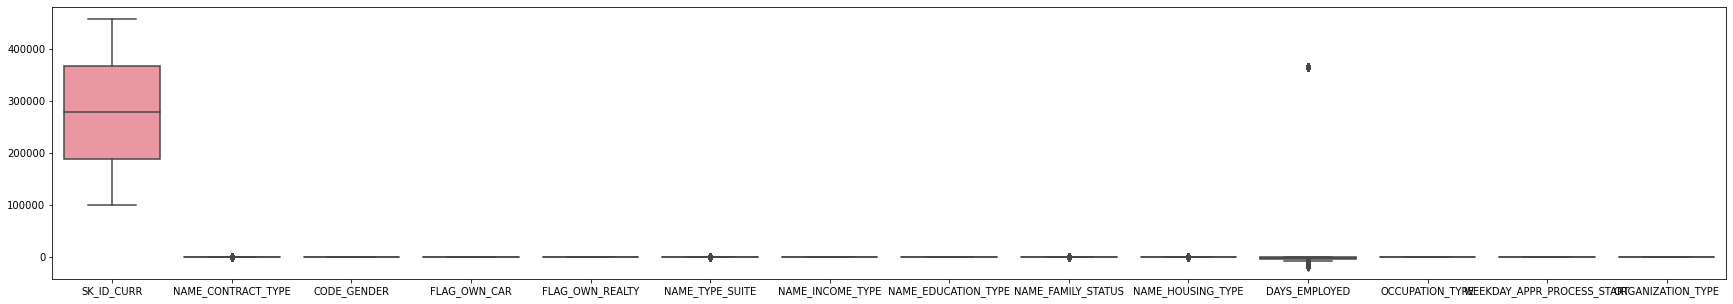

In [69]:
plt.figure(figsize=(30,5))
sns.boxplot(data=df.select_dtypes('int'))
plt.show()

<AxesSubplot:xlabel='DAYS_EMPLOYED'>

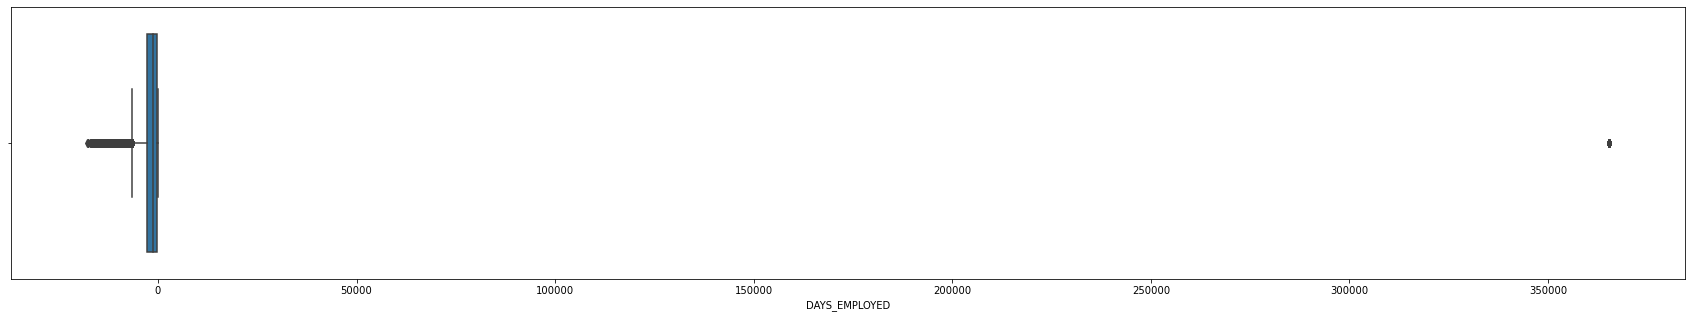

In [70]:
plt.figure(figsize=(30,5))
sns.boxplot(df['DAYS_EMPLOYED'])

In [71]:
df['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [72]:
df['DAYS_EMPLOYED'].value_counts()

 365243    55374
-200         156
-224         152
-230         151
-199         151
           ...  
-11060         1
-10409         1
-10155         1
-11948         1
-12341         1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

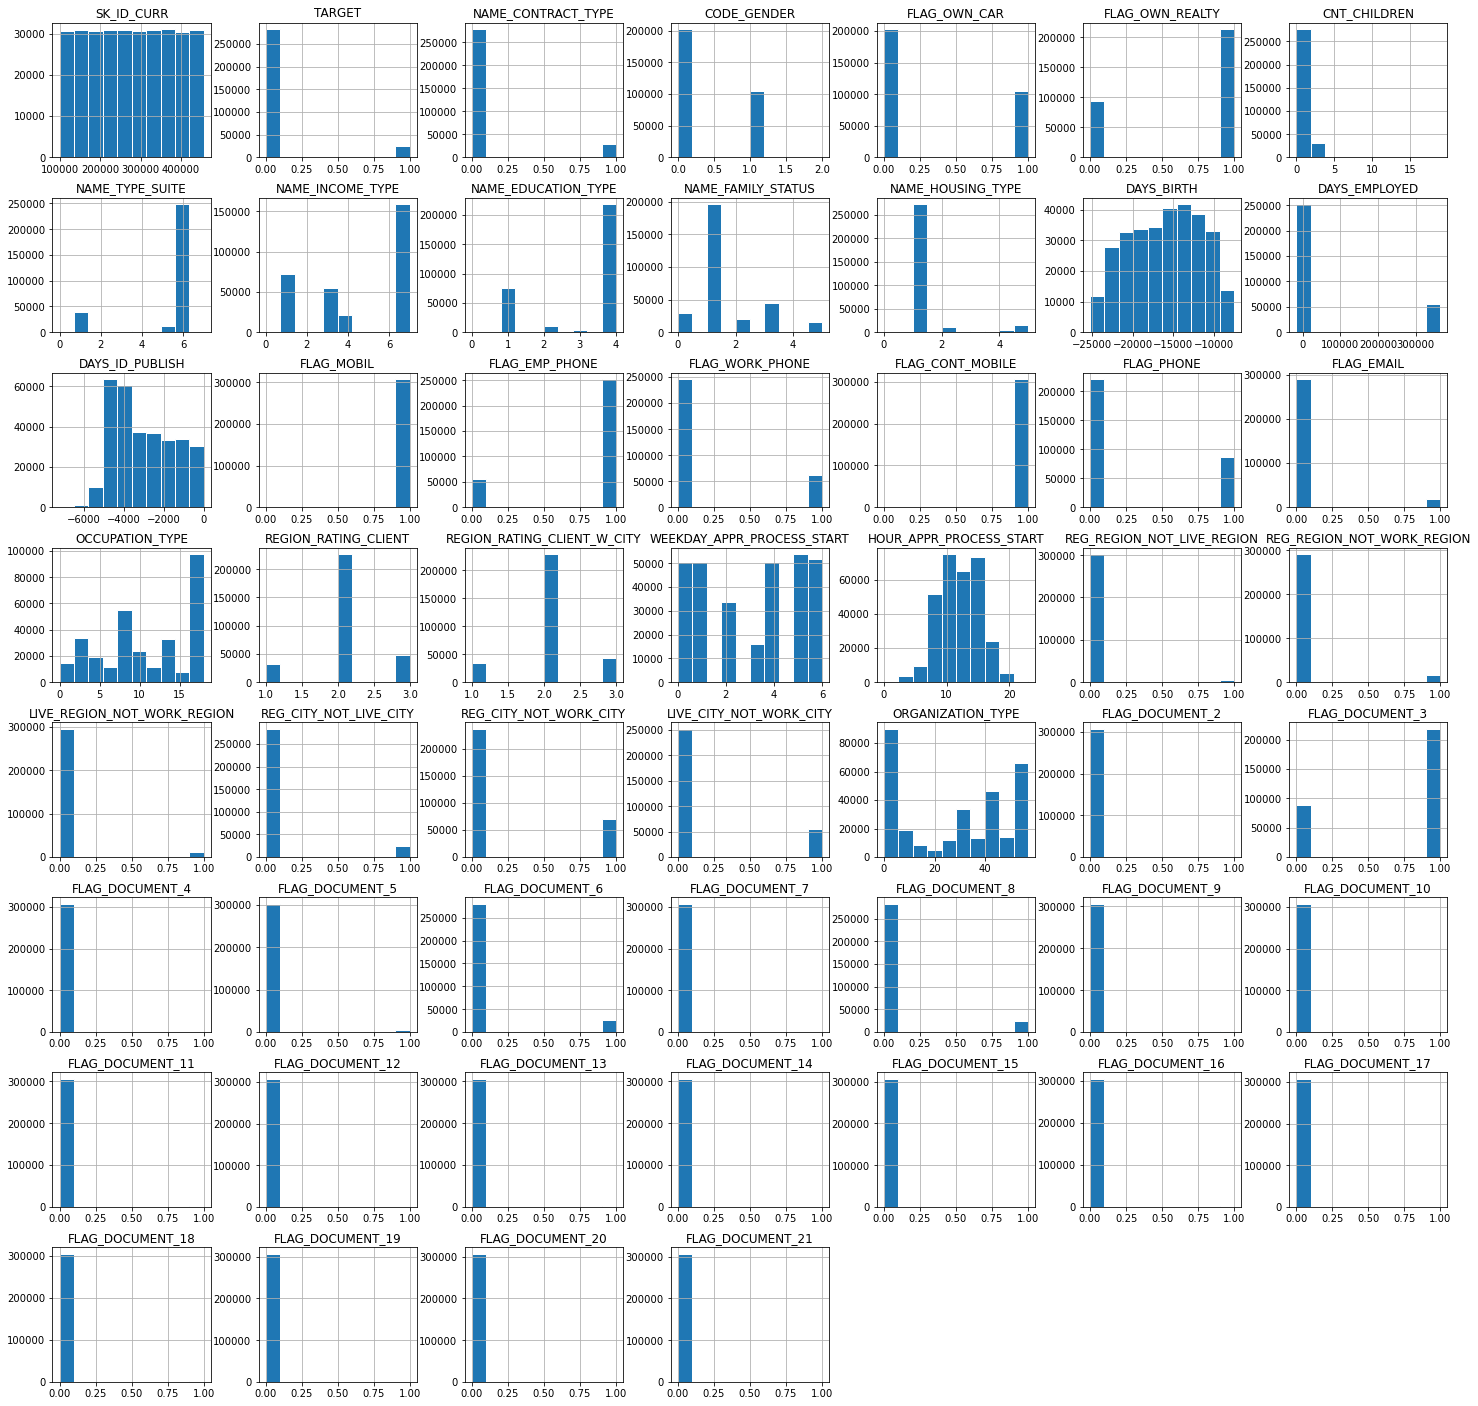

In [73]:
df[int_cols].hist(figsize=(25,25), ec='w')
plt.show()

In [74]:
def color_(value):
    if value < 0 :
        color = 'red'
    elif value == 1 :
        color = 'blue'
    else:
        color = 'green'
    return 'color: %s' % color
df[int_cols].corr().style.applymap(color_)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
SK_ID_CURR,1.000000,-0.002108,0.001654,-0.000769,0.001216,0.000703,-0.001129,0.001045,-0.002112,-0.000529,0.002846,0.002191,-0.001500,0.001366,-0.000384,0.002804,-0.001337,-0.000415,0.002815,0.002753,0.000281,0.000421,-0.001075,-0.001138,0.002185,0.000350,-0.000283,0.001097,0.002903,-0.001885,-0.001582,0.000067,0.002269,0.000700,-0.003411,-0.004139,-0.001097,0.002121,-0.002694,0.001809,0.001505,-0.000815,-0.002012,-0.001045,0.000896,-0.001077,0.002604,-0.000724,0.001450,0.000509,0.000167,0.001073,0.000282
TARGET,-0.002108,1.000000,-0.030896,0.054692,-0.021851,-0.006148,0.019187,0.008074,0.046829,0.054699,-0.004127,0.034489,0.078239,-0.044932,0.051457,0.000534,0.045982,0.028524,0.000370,-0.023806,-0.001758,-0.019510,0.058899,0.060893,0.004002,-0.024166,0.005576,0.006942,0.002819,0.044395,0.050994,0.032518,-0.030765,0.005417,0.044346,-0.002672,-0.000316,-0.028602,-0.001520,-0.008040,-0.004352,-0.001414,-0.004229,-0.000756,-0.011583,-0.009464,-0.006536,-0.011615,-0.003378,-0.007952,-0.001358,0.000215,0.003709
NAME_CONTRACT_TYPE,0.001654,-0.030896,1.000000,-0.008613,0.004022,0.067177,0.029998,0.012998,0.005428,-0.065086,0.011272,0.024190,0.086364,-0.054450,0.052847,0.000585,0.054938,-0.033647,-0.097116,-0.021378,-0.010811,-0.028506,-0.021593,-0.023116,-0.006925,0.035897,0.018561,0.015774,0.007941,0.013586,0.004487,-0.004999,-0.040187,-0.002109,-0.479724,0.004448,0.029372,-0.098808,0.042703,-0.084961,-0.006592,0.014708,0.025995,-0.000827,-0.004900,0.000005,-0.007783,-0.023433,-0.000548,-0.007530,-0.005190,-0.007308,0.055821
CODE_GENDER,-0.000769,0.054692,-0.008613,1.000000,0.345833,-0.044340,0.047403,0.030121,0.065089,0.009554,-0.099713,0.058767,0.148080,-0.156018,0.000130,-0.002503,0.157253,0.034030,-0.006017,-0.019429,0.018218,-0.135122,-0.017862,-0.017263,-0.000271,0.007177,0.023683,0.103437,0.106060,0.048237,0.137541,0.133239,-0.163879,-0.001520,-0.087338,-0.002693,0.003255,-0.100766,-0.002059,0.249767,-0.008070,0.000874,0.004830,0.000851,0.040447,0.000947,0.020888,0.000061,0.003772,0.022205,0.004632,0.003258,0.023908
FLAG_OWN_CAR,0.001216,-0.021851,0.004022,0.345833,1.000000,-0.002817,0.102023,0.004151,0.033186,-0.093977,-0.131014,-0.004041,0.129879,-0.154441,0.013661,-0.002512,0.154659,0.011471,-0.006644,-0.007588,0.032105,-0.123339,-0.022668,-0.021405,0.002346,0.014369,-0.000668,0.038937,0.046352,0.003123,0.076081,0.088061,-0.114162,-0.000445,-0.070000,-0.001144,-0.013661,-0.106012,0.000958,0.228368,-0.011069,0.000891,-0.000456,0.003552,0.080647,0.003410,0.045909,0.001984,-0.002476,-0.000097,0.002184,0.007299,0.006741
FLAG_OWN_REALTY,0.000703,-0.006148,0.067177,-0.044340,-0.002817,1.000000,-0.002366,-0.051949,-0.026539,0.022130,0.000521,-0.199722,-0.119146,0.069677,0.006664,-0.001198,-0.070021,-0.114043,0.008526,-0.041507,0.029247,0.039879,0.001289,0.001884,-0.003414,-0.102687,-0.036301,-0.032316,-0.018324,-0.061709,-0.061889,-0.035991,0.050389,0.003236,-0.036839,0.002080,-0.011922,0.041567,0.003093,-0.035077,-0.003513,0.003171,-0.035201,-0.001071,-0.057484,-0.054678,-0.035729,-0.092272,-0.014207,-0.087687,-0.019364,-0.0

<AxesSubplot:>

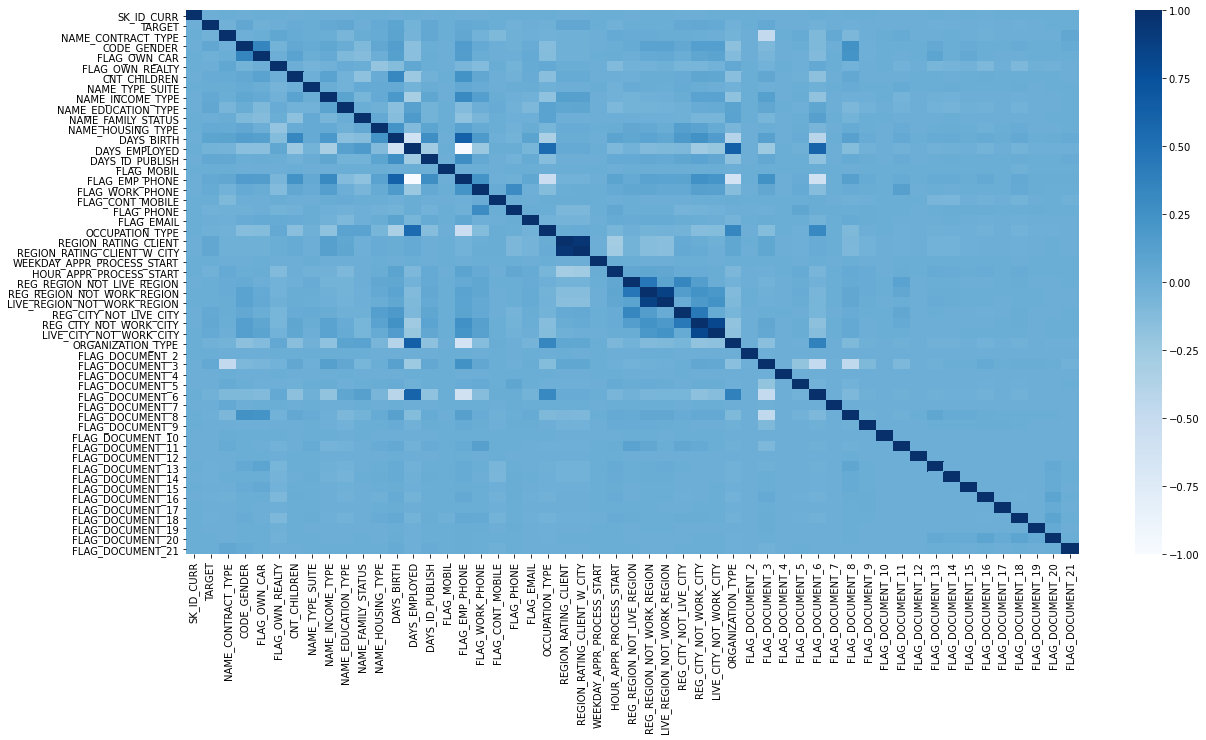

In [75]:
plt.figure(figsize=(20,10))
sns.heatmap(df[int_cols].corr(), cmap='Blues', vmin=-1, vmax=1)

In [76]:
df.shape

(307511, 78)

### 3. float datatype

In [77]:
print("float type values:",np.count_nonzero(df.select_dtypes(include=['float16', 'float32', 'float64']).columns))

float type values: 25


In [78]:
float_cols = df.select_dtypes(include=['float16', 'float32', 'float64']).columns
float_cols

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'STD_OF_LIVING_AVG',
       'STD_OF_LIVING_MEDIAN', 'STD_OF_LIVING_MODE'],
      dtype='object')

In [79]:
df[float_cols].isnull().sum().sort_values(ascending = False)

OWN_CAR_AGE                   202929
EXT_SOURCE_1                  173378
EXT_SOURCE_3                   60965
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_HOUR     41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_MON      41519
OBS_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
EXT_SOURCE_2                     660
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
STD_OF_LIVING_AVG                  0
STD_OF_LIVING_MEDIAN               0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
DAYS_REGISTRATION                  0
REGION_POPULATION_RELATIVE         0
STD_OF_LIVING_MODE                 0
dtype: int64

In [80]:
df.shape

(307511, 78)

In [81]:
cor1 = df['TARGET'].corr(df['OWN_CAR_AGE'])
cor1

0.037611564275165606

In [82]:
cor1 = df['TARGET'].corr(df['EXT_SOURCE_1'])
cor1

-0.15531772479771846

In [83]:
df[float_cols]

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,STD_OF_LIVING_AVG,STD_OF_LIVING_MEDIAN,STD_OF_LIVING_MODE
0,202500.0,406597.5,24700.5,351000.0,0.018799,-3648.0,NaN,1.0,0.083008,0.262939,0.139404,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,0.144327,0.144825,0.185280
1,270000.0,1293502.5,35698.5,1129500.0,0.003542,-1186.0,NaN,2.0,0.311279,0.622070,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0.206314,0.206803,0.194404
2,67500.0,135000.0,6750.0,135000.0,0.010033,-4260.0,26.0,1.0,NaN,0.556152,0.729492,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.212803,0.188466,0.252777
3,135000.0,312682.5,29686.5,297000.0,0.008018,-9832.0,NaN,2.0,NaN,0.650391,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,0.212803,0.188466,0.252777
4,121500.0,513000.0,21865.5,513000.0,0.028656,-4312.0,NaN,1.0,NaN,0.322754,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0.212803,0.188466,0.252777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,157500.0,254700.0,27558.0,225000.0,0.032562,-8456.0,NaN,1.0,0.145630,0.681641,NaN,0.0,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN,0.279728,0.280738,0.231063
307507,72000.0,269550.0,12001.5,225000.0,0.025162,-4388.0,NaN,1.0,NaN,0.115967,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.148894,0.149385,0.189005
307508,153000.0,677664.0,29979.0,585000.0,0.005001,-6736.0,NaN,1.0,0.744141,0.535645,0.218872,6.0,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0,0.256546,0.256898,0.300281
307509,171000.0,370107.0,20205.0,319500.0,0.005314,-2562.0,NaN,2.0,NaN,0.514160,0.661133,0.0,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0,0.179064,0.164105,0.153839


In [84]:
df.shape

(307511, 78)

In [85]:
df[float_cols].isnull().sum().sort_values(ascending = False)

OWN_CAR_AGE                   202929
EXT_SOURCE_1                  173378
EXT_SOURCE_3                   60965
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_HOUR     41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_MON      41519
OBS_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
EXT_SOURCE_2                     660
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
STD_OF_LIVING_AVG                  0
STD_OF_LIVING_MEDIAN               0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
DAYS_REGISTRATION                  0
REGION_POPULATION_RELATIVE         0
STD_OF_LIVING_MODE                 0
dtype: int64

In [86]:
df.interpolate(method ='linear', limit_direction ='forward', inplace=True)

In [87]:
df.shape

(307511, 78)

In [88]:
df[float_cols].isnull().sum().sort_values(ascending = False)

OWN_CAR_AGE                   2
AMT_INCOME_TOTAL              0
OBS_60_CNT_SOCIAL_CIRCLE      0
STD_OF_LIVING_MEDIAN          0
STD_OF_LIVING_AVG             0
AMT_REQ_CREDIT_BUREAU_YEAR    0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_HOUR    0
DAYS_LAST_PHONE_CHANGE        0
DEF_60_CNT_SOCIAL_CIRCLE      0
DEF_30_CNT_SOCIAL_CIRCLE      0
AMT_CREDIT                    0
OBS_30_CNT_SOCIAL_CIRCLE      0
EXT_SOURCE_3                  0
EXT_SOURCE_2                  0
EXT_SOURCE_1                  0
CNT_FAM_MEMBERS               0
DAYS_REGISTRATION             0
REGION_POPULATION_RELATIVE    0
AMT_GOODS_PRICE               0
AMT_ANNUITY                   0
STD_OF_LIVING_MODE            0
dtype: int64

In [89]:
df['OWN_CAR_AGE']

0           NaN
1           NaN
2         26.00
3         23.75
4         21.50
          ...  
307506    10.00
307507    10.00
307508    10.00
307509    10.00
307510    10.00
Name: OWN_CAR_AGE, Length: 307511, dtype: float16

In [90]:
df.shape

(307511, 78)

In [91]:
df.dropna(axis = 'index', how='any', inplace=True)

In [92]:
df.isnull().sum().sum()

0

In [93]:
df.shape

(307509, 78)

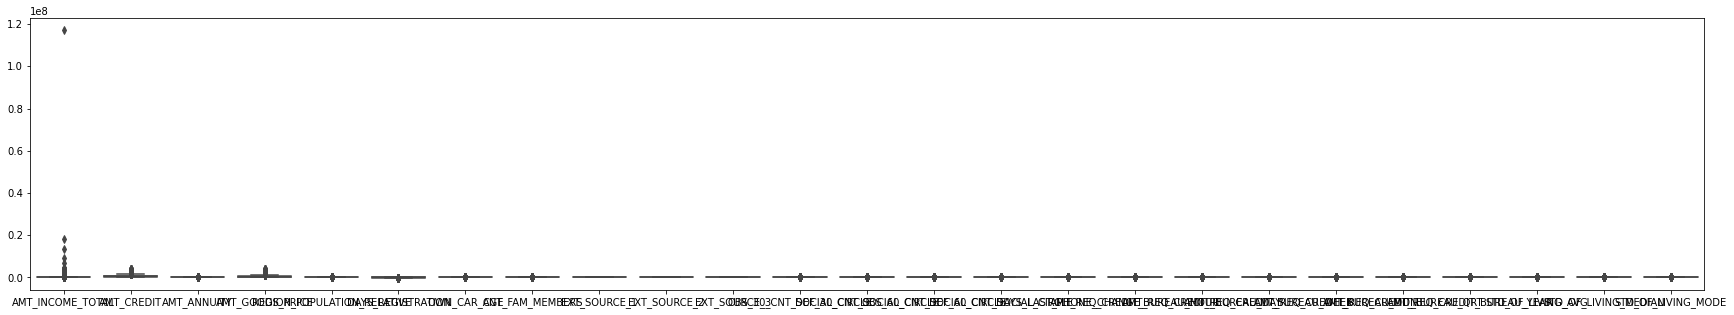

In [94]:
plt.figure(figsize=(30,5))
sns.boxplot(data=df[float_cols])
plt.show()

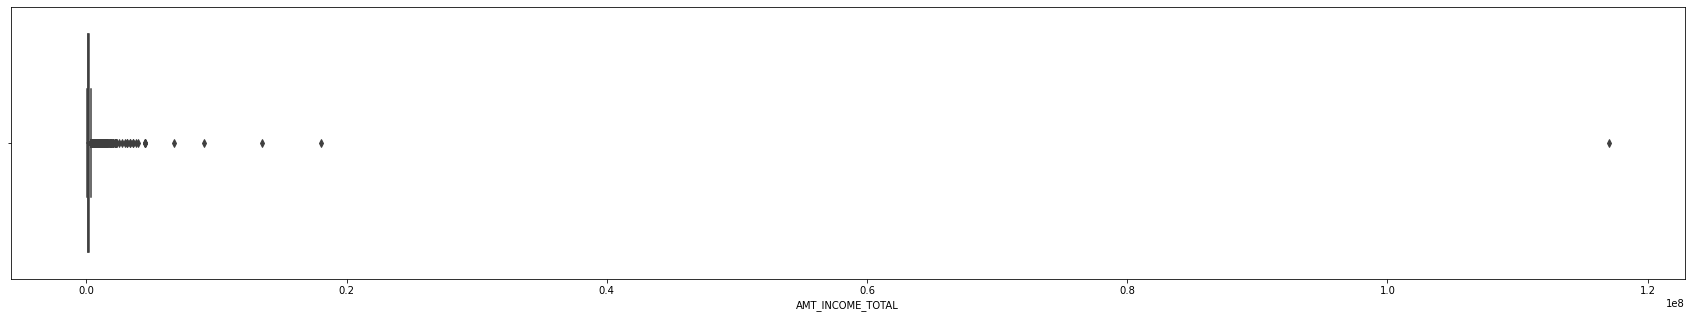

In [95]:
plt.figure(figsize=(30,5))
sns.boxplot(df['AMT_INCOME_TOTAL'])
plt.show()

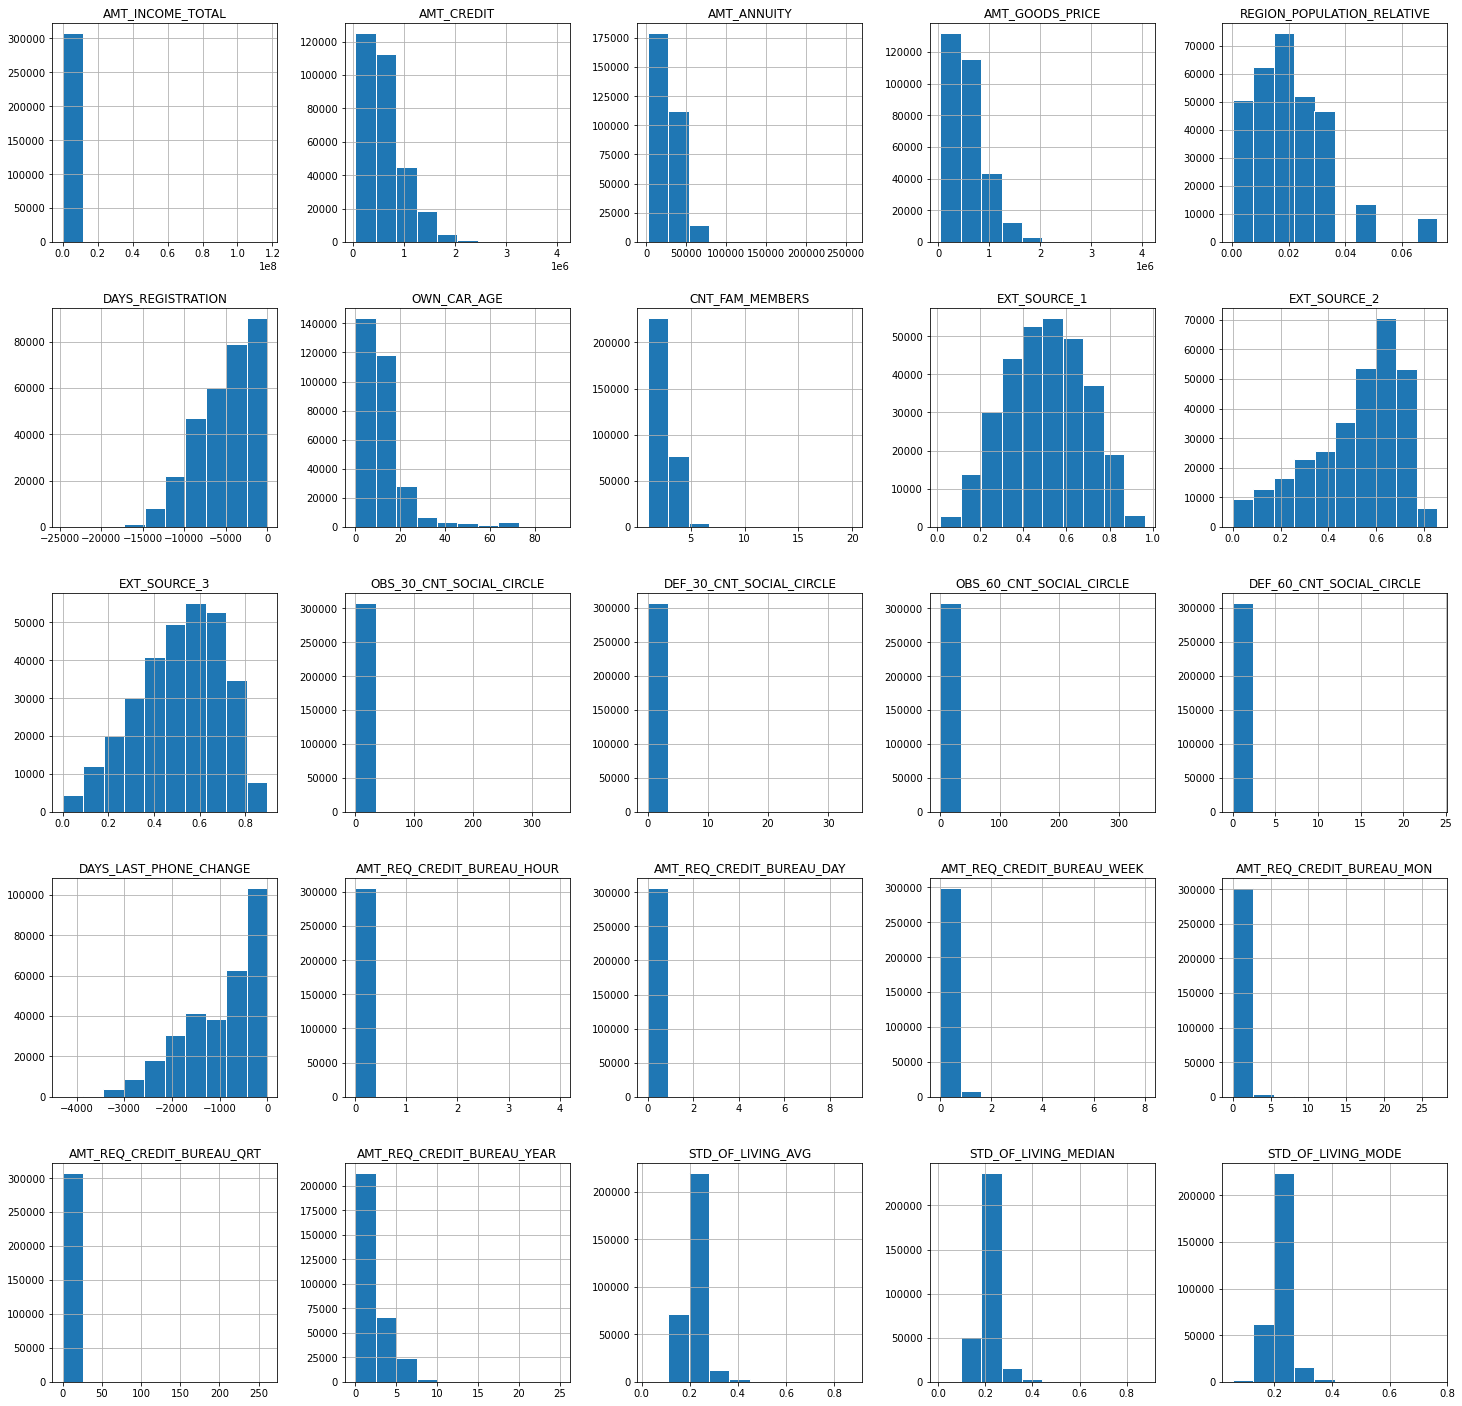

In [96]:
df[float_cols].hist(figsize=(25,25), ec='w')
plt.show()

In [97]:
def color_(value):
    if value < 0 :
        color = 'red'
    elif value == 1 :
        color = 'blue'
    else:
        color = 'green'
    return 'color: %s' % color
df[float_cols].corr().style.applymap(color_)

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,STD_OF_LIVING_AVG,STD_OF_LIVING_MEDIAN,STD_OF_LIVING_MODE
AMT_INCOME_TOTAL,1.000000,0.156869,0.191653,0.159578,0.074801,0.027805,-0.026508,0.016342,0.019349,0.060873,-0.027185,-0.013009,-0.013257,-0.012934,-0.013131,-0.018585,0.000746,0.002772,0.002254,0.023054,0.005542,0.010658,0.042475,0.052961,0.008190
AMT_CREDIT,0.156869,1.000000,0.770115,0.986442,0.099754,0.009616,-0.038763,0.063159,0.088041,0.131027,0.037617,0.000336,-0.021149,0.000380,-0.023680,-0.073701,-0.002853,0.003615,-0.001611,0.048894,0.014430,-0.045067,0.058651,0.070522,0.017337
AMT_ANNUITY,0.191653,0.770115,1.000000,0.774544,0.118437,0.038524,-0.041324,0.075535,0.062726,0.125634,0.025631,-0.011741,-0.022727,-0.011495,-0.023895,-0.063748,0.003756,0.001763,0.011991,0.034713,0.008888,-0.011100,0.073103,0.086394,0.023044
AMT_GOODS_PRICE,0.159578,0.986442,0.774544,1.000000,0.103553,0.011574,-0.043407,0.061135,0.091837,0.139143,0.041112,0.000474,-0.022160,0.000484,-0.024421,-0.076243,-0.002264,0.004152,-0.001278,0.050634,0.014924,-0.047420,0.063071,0.075663,0.016379
REGION_POPULATION_RELATIVE,0.074801,0.099754,0.118437,0.103553,1.000000,-0.053815,-0.033464,-0.024203,0.052483,0.198650,-0.004945,-0.011019,0.006448,-0.010505,0.002597,-0.044013,-0.002329,0.000364,-0.002203,0.070208,-0.001004,-0.000813,0.185471,0.205902,0.089825
DAYS_REGISTRATION,0.027805,0.009616,0.038524,0.011574,-0.053815,1.000000,-0.010916,0.173419,-0.082825,-0.059785,-0.090517,0.009151,0.003281,0.009120,0.004457,0.056982,-0.001890,0.000414,-0.000483,-0.010797,-0.001465,-0.022274,0.021853,0.003614,0.044945
OWN_CAR_AGE,-0.026508,-0.038763,-0.041324,-0.043407,-0.033464,-0.010916,1.000000,-0.004224,-0.026738,-0.031789,-0.004871,0.002274,0.004805,0.002259,0.005167,0.000948,0.000351,-0.004104,0.001229,-0.008243,-0.005281,-0.003081,-0.019863,-0.025257,-0.000957
CNT_FAM_MEMBERS,0.016342,0.063159,0.075535,0.061135,-0.024203,0.173419,-0.004224,1.000000,-0.048462,-0.001812,-0.023839,0.025265,-0.002624,0.024916,-0.004612,-0.027109,0.000566,-0.001914,-0.001431,-0.007893,-0.003576,-0.025810,0.000335,-0.015713,0.029573
EXT_SOURCE_1,0.019349,0.088041,0.062726,0.091837,0.052483,-0.082825,-0.026738,-0.048462,1.000000,0.103394,0.085234,-0.013822,-0.015823,-0.013696,-0.016799,-0.065840,-0.000632,-0.002430,-0.000409,0.014336,-0.001055,0.002030,0.026738,0.037513,-0.003562
EXT_SOURCE_2,0.060873,0.131027,0.125634,0.139143,0.198650,-0.059785,-0.031789,-0.001812,0.103394,1.000000,0.090868,-0.019071,-0.030284,-0.018723,-0.032254,-0.195387,-0.003881,0.000452,0.001778,0.045087,-0.002730,-0.020364,0.073431,0.100070,-0.010681


<AxesSubplot:>

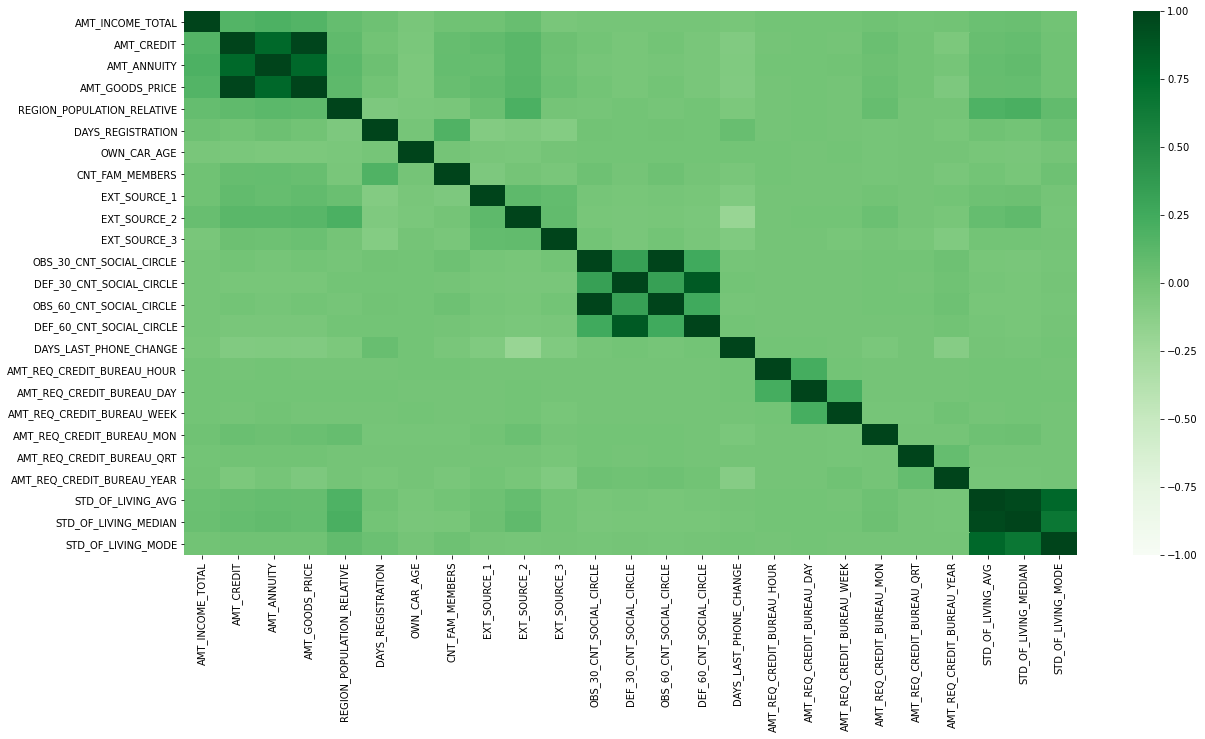

In [98]:
plt.figure(figsize=(20,10))
sns.heatmap(df[float_cols].corr(), cmap='Greens', vmin=-1, vmax=1)

## Correlation Matrix and Heatmap

In [99]:
def color_(value):
    if value < 0 :
        color = 'red'
    elif value == 1 :
        color = 'blue'
    else:
        color = 'green'
    return 'color: %s' % color

In [100]:
df.corr().style.applymap(color_)

<AxesSubplot:>

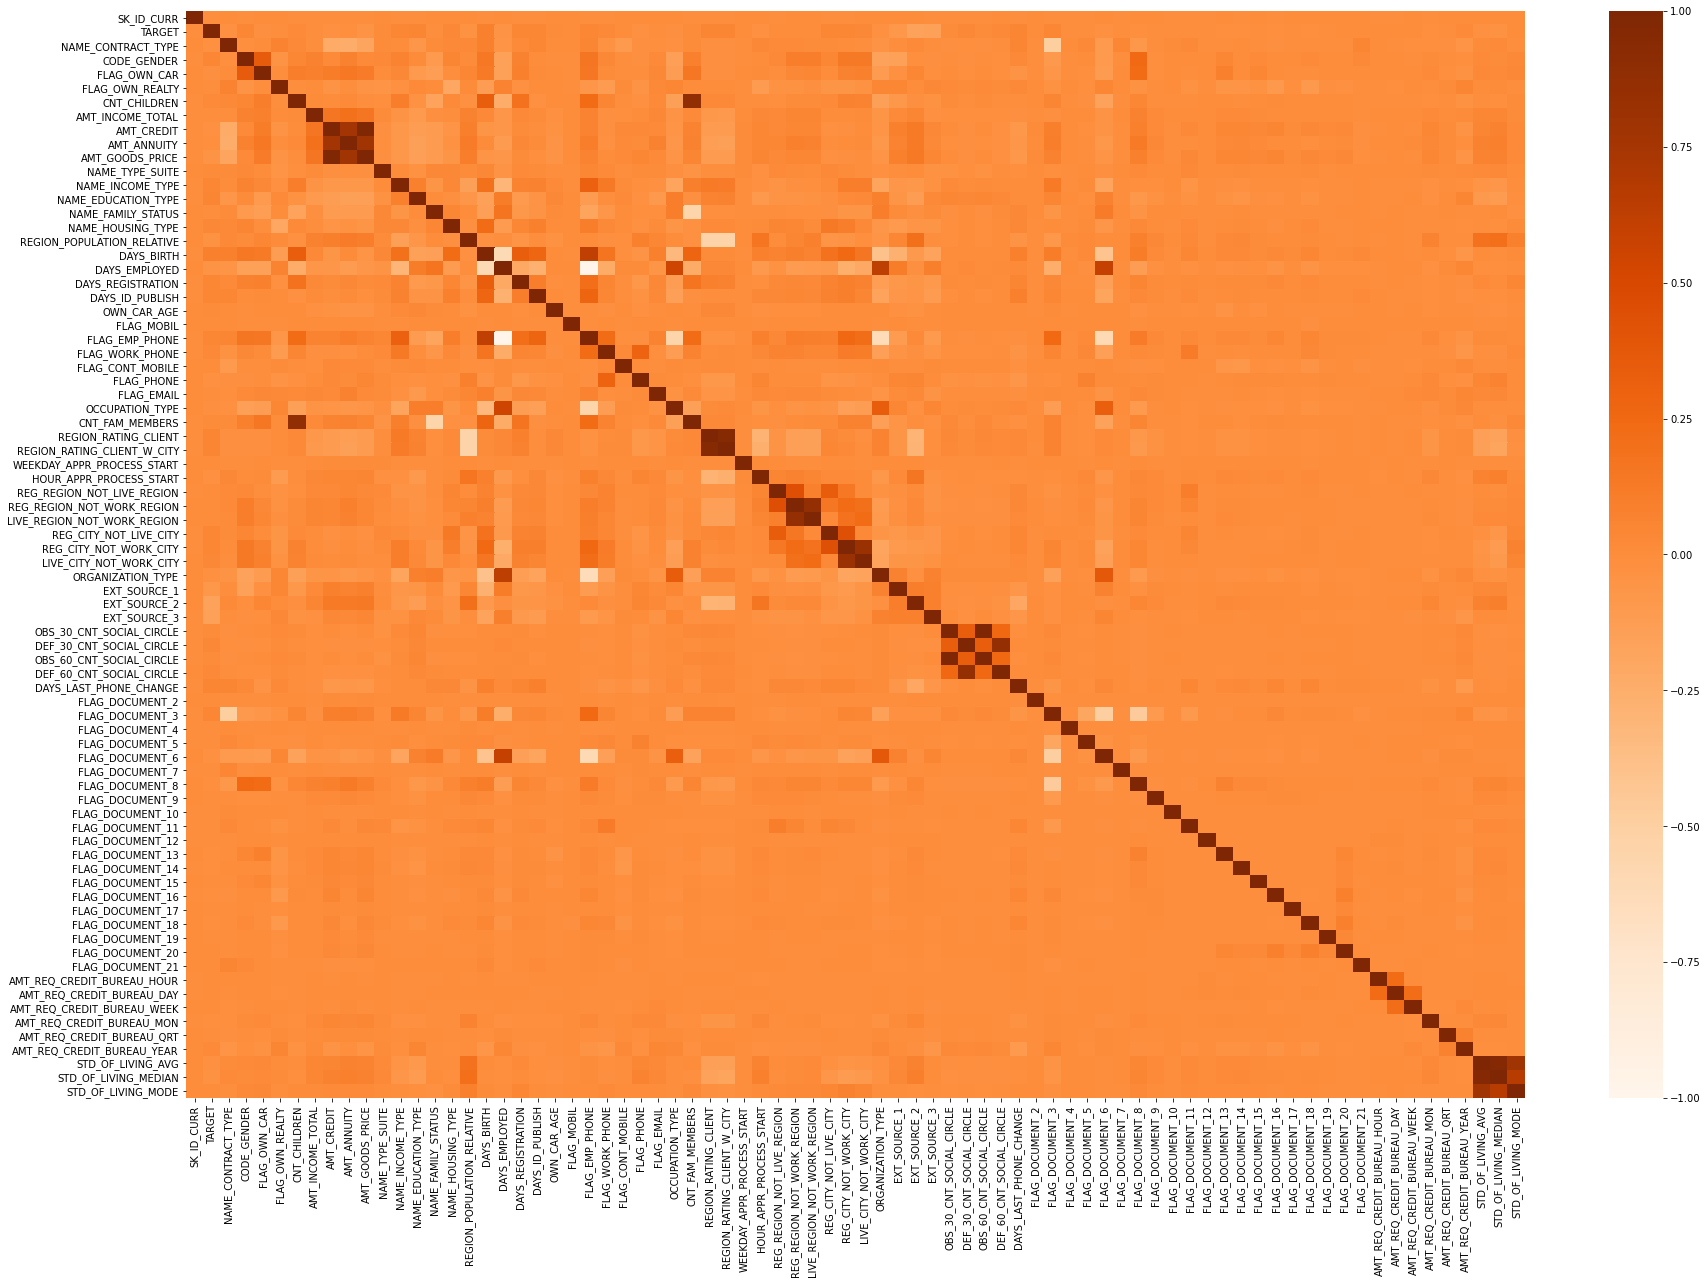

In [101]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), cmap='Oranges', vmin=-1, vmax=1)

In [102]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,STD_OF_LIVING_AVG,STD_OF_LIVING_MEDIAN,STD_OF_LIVING_MODE
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010033,-19046,-225,-4260.0,-2531,26.00,1,1,1,1,1,0,8,1.0,2,2,1,9,0,0,0,0,0,0,11,0.404053,0.556152,0.729492,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.212803,0.188466,0.252777
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008018,-19005,-3039,-9832.0,-2437,23.75,1,1,0,1,0,0,8,2.0,2,2,6,17,0,0,0,0,0,0,5,0.496826,0.650391,0.693359,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.212803,0.188466,0.252777
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028656,-19932,-3038,-4312.0,-3458,21.50,1,1,0,1,0,0,3,1.0,2,2,4,11,0,0,0,0,1,1,37,0.589355,0.322754,0.657227,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.212803,0.188466,0.252777
5,100008,0,0,1,0,1,0,99000.0,490495.5,27517.5,454500.0,5,4,4,1,1,0.035797,-16941,-1588,-4968.0,-477,19.25,1,1,1,1,1,0,8,2.0,2,2,6,16,0,0,0,0,0,0,33,0.682129,0.354248,0.621094,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,0.000000,1.0,1.000000,0.212803,0.188466,0.252777
6,100009,0,0,0,1,1,1,171000.0,1560726.0,41301.0,1395000.0,6,1,1,1,1,0.035797,-13778,-3130,-1213.0,-619,17.00,1,1,0,1,1,0,0,3.0,2,2,3,16,0,0,0,0,0,0,5,0.774902,0.724121,0.491943,1.0,0.0,1.0,0.0,-1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.000000,0.0,0.0,1.000000,1.0,2.000000,0.212803,0.188466,0.252777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,1,0,0,0,157500.0,254700.0,27558.0,225000.0,6,7,4,2,5,0.032562,-9327,-236,-8456.0,-1982,10.00,1,1,0,1,0,0,14,1.0,1,1,4,15,0,0,0,0,0,0,43,0.145630,0.681641,0.567871,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.333252,0.0,0.0,1.666992,0.0,0.333252,0.279728,0.280738,0.231063
307507,456252,0,0,0,0,1,0,72000.0,269550.0,12001.5,225000.0,6,3,4,5,1,0.025162,-20775,365243,-4388.0,-4090,10.00,1,0,0,1,1,0,18,1.0,2,2,1,8,0,0,0,0,0,0,57,0.444824,0.115967,0.393311,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.666504,0.0,0.0,1.333008,0.0,0.666504,0.148894,0.149385,0.189005
307508,456253,0,0,0,0,1,0,153000.0,677664.0,29979.0,585000.0,6,7,1,2,1,0.005001,-14966,-7921,-6736.0,-5150,10.

# Visulization of DATA

### Function for createing the catogrical analysis on Defaulters and Non-Defaulters

In [103]:
#function for plotting categories based on defaulters and non-defaulters
def biplot(data, var,label_rotation):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,10))
    s1=sns.barplot(ax=ax1,x=defaulters[var].value_counts().index, data=defaulters, y= 100.* defaulters[var].value_counts(normalize=True))
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90,fontsize=12)
    ax1.set_title('Distribution of '+ '%s' %var +' - Defaulters', fontsize=15)
    ax1.set_xlabel('%s' %var,fontsize=15)
    ax1.set_ylabel("% of Loans",fontsize=15)
   
    s2=sns.barplot(ax=ax2,x=nondefaulters[var].value_counts().index, data=nondefaulters, y= 100.* nondefaulters[var].value_counts(normalize=True))
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90,fontsize=12)
    ax2.set_xlabel('%s' %var, fontsize=15)
    ax2.set_ylabel("% of Loans", fontsize=15)
    ax2.set_title('Distribution of '+ '%s' %var +' - Non-Defaulters', fontsize=15)
    plt.show()

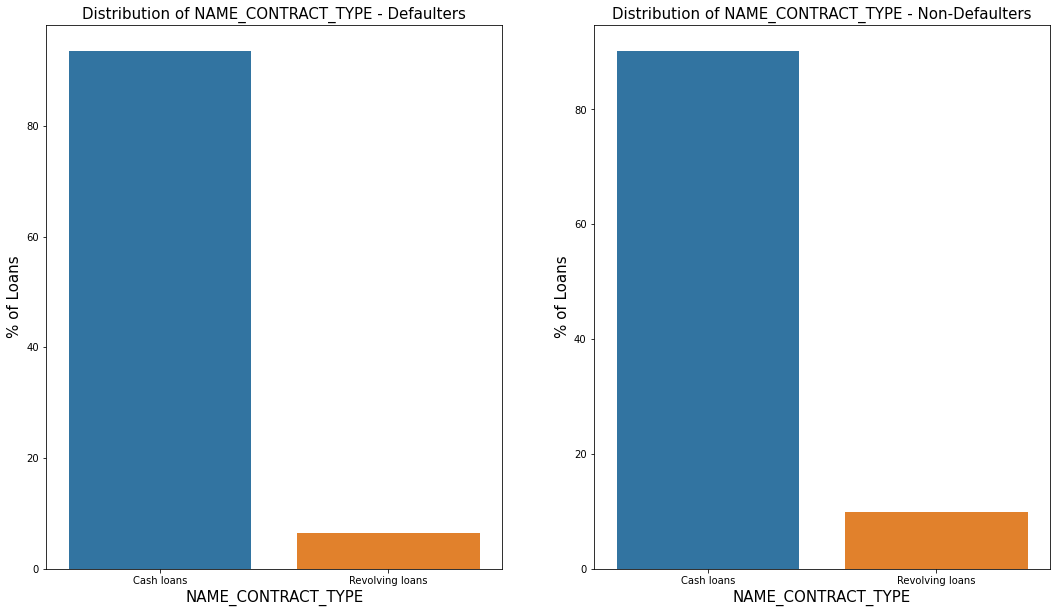

In [104]:
biplot(df, 'NAME_CONTRACT_TYPE', False)

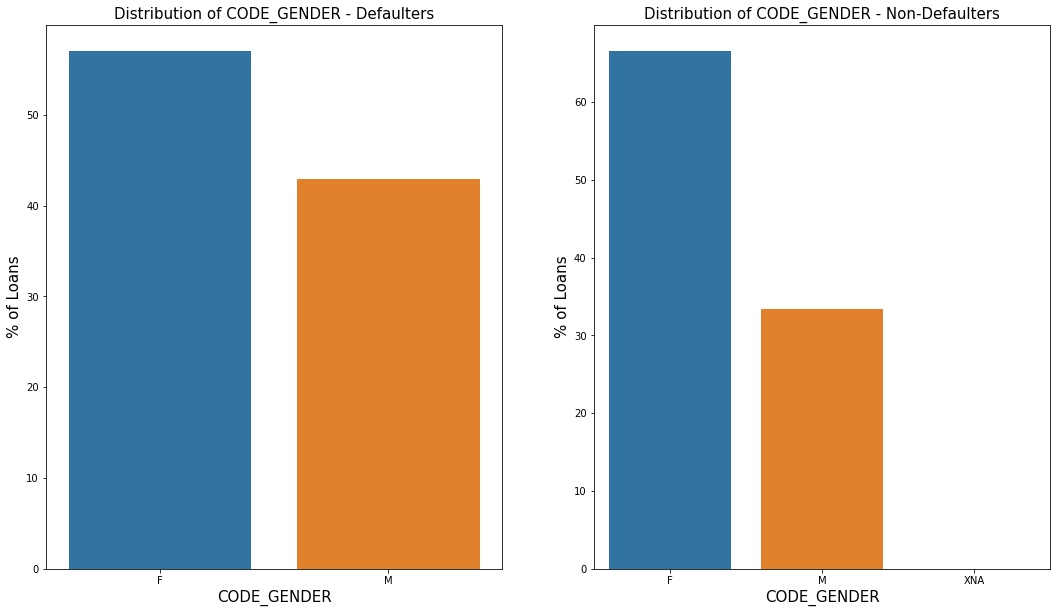

In [105]:
biplot(df, 'CODE_GENDER',False)

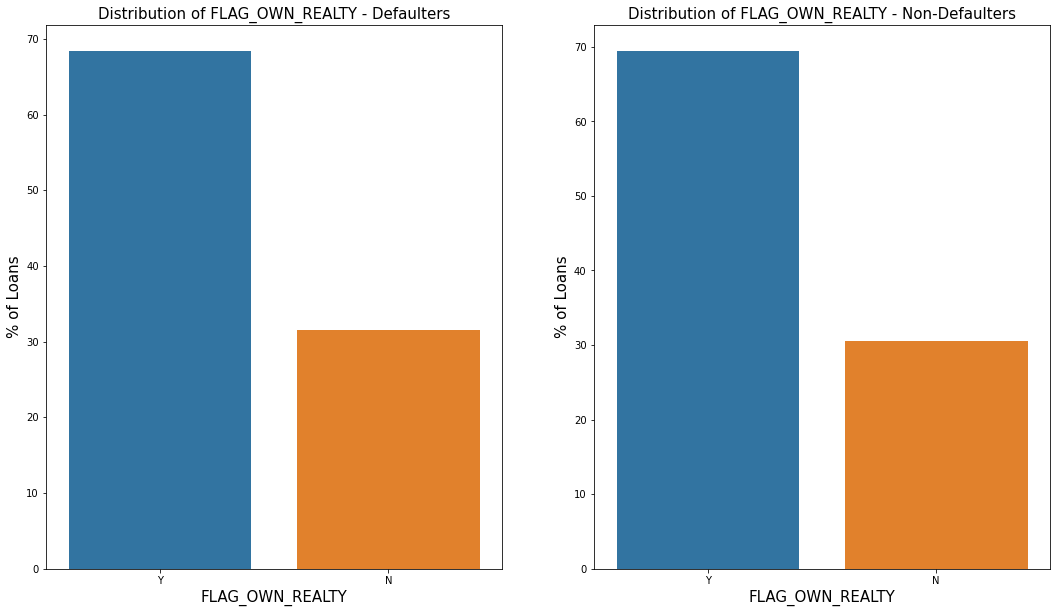

In [106]:
biplot(df, 'FLAG_OWN_REALTY',False)

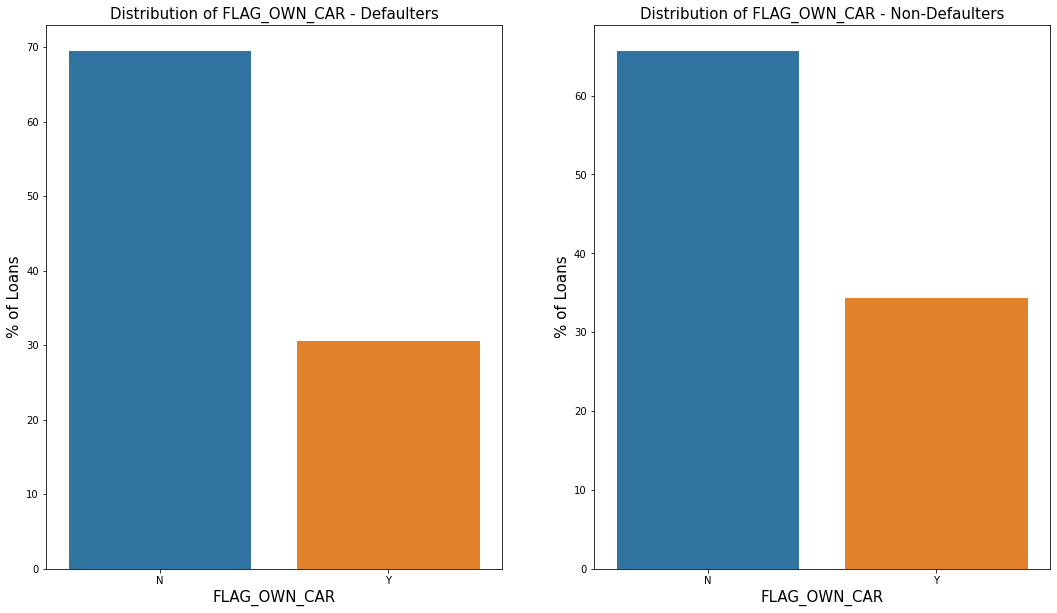

In [107]:
biplot(df, 'FLAG_OWN_CAR', False)

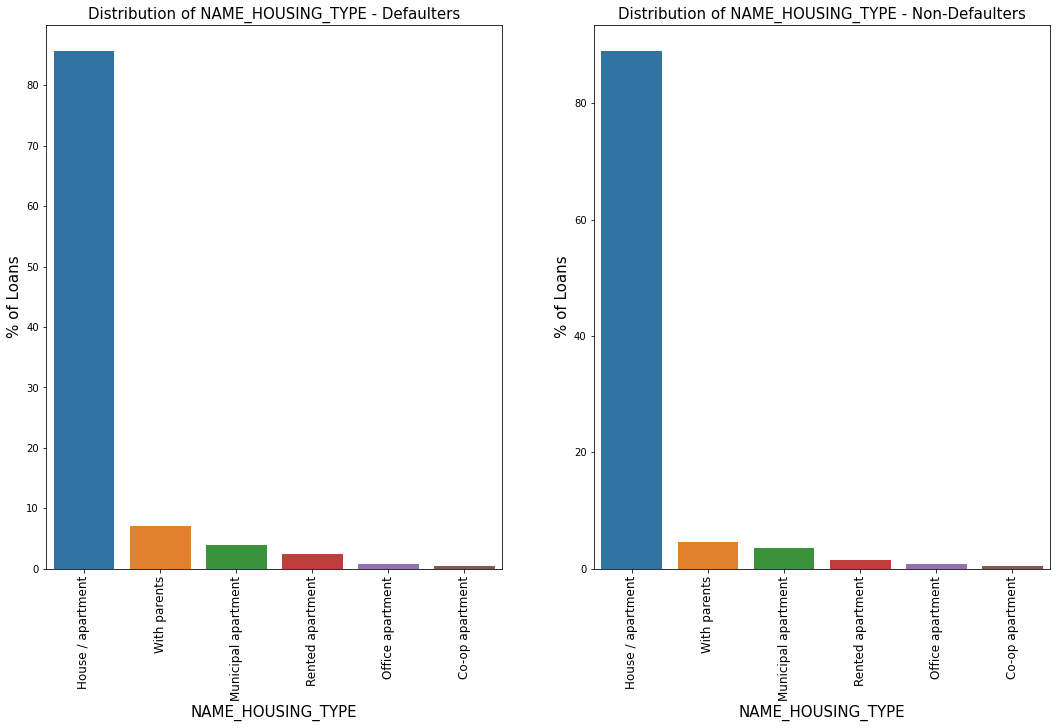

In [108]:
biplot(df, 'NAME_HOUSING_TYPE', True)

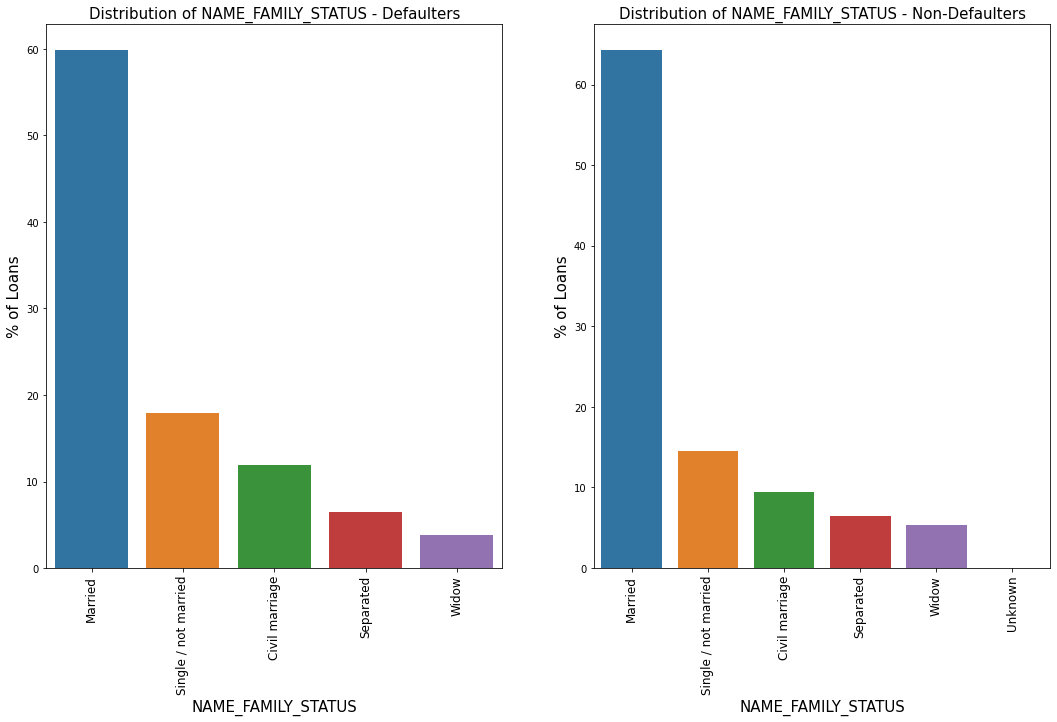

In [109]:
biplot(df, 'NAME_FAMILY_STATUS', True)

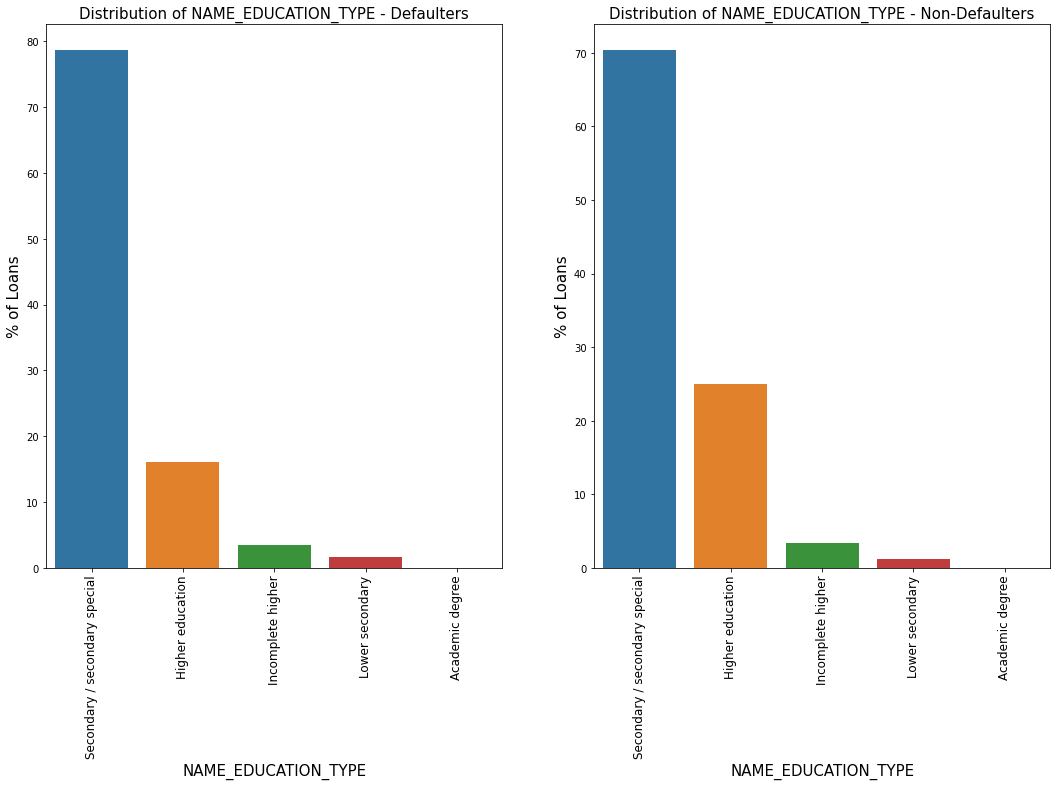

In [110]:
biplot(df, 'NAME_EDUCATION_TYPE', True)

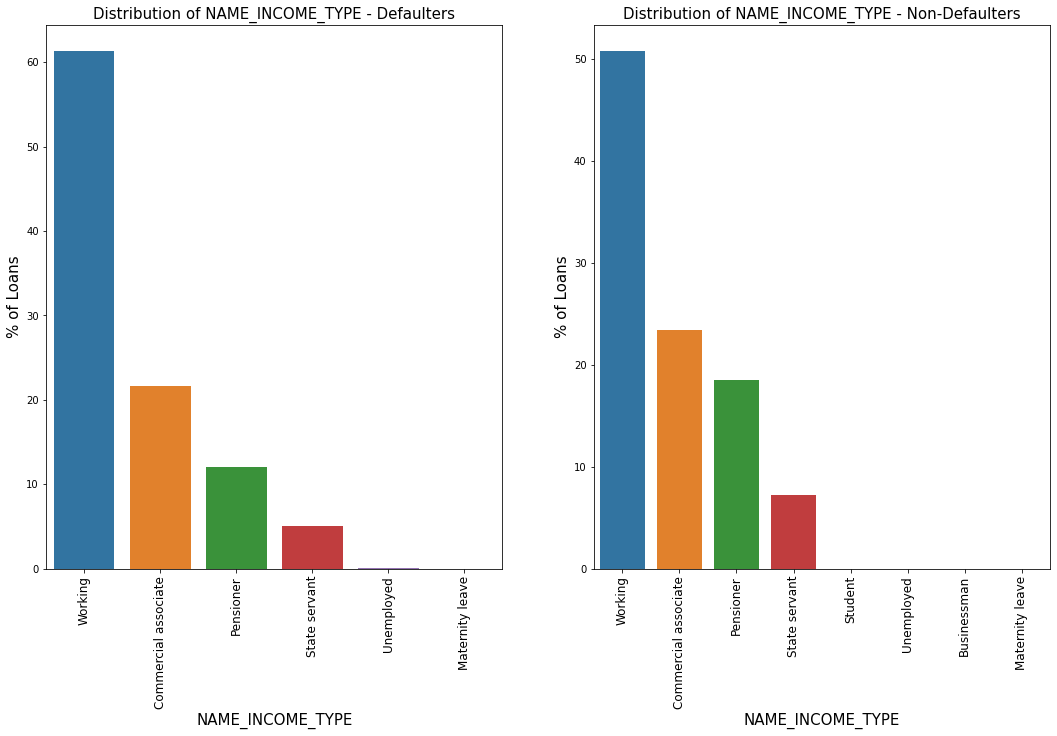

In [111]:
biplot(df, 'NAME_INCOME_TYPE', True)

In [112]:
#function for plotting categories based on defaulters and non-defaulters for organization type
def biplot_orgtype(data, var,label_rotation):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(40,15))
    s1=sns.countplot(ax=ax1,x=defaulters[var], data=defaulters, order= defaulters[var].value_counts().index)
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90,fontsize=18)
    ax1.set_title('Distribution of '+ '%s' %var +' - Defaulters', fontsize=15)
    ax1.set_xlabel('%s' %var,fontsize=15)
    ax1.set_ylabel("Count of Loans",fontsize=15)
   
    s2=sns.countplot(ax=ax2,x=nondefaulters[var], data=nondefaulters, order= nondefaulters[var].value_counts().index)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90,fontsize=18)
    ax2.set_xlabel('%s' %var, fontsize=15)
    ax2.set_ylabel("Count of Loans", fontsize=15)
    ax2.set_title('Distribution of '+ '%s' %var +' - Non-Defaulters', fontsize=15)
    plt.show()

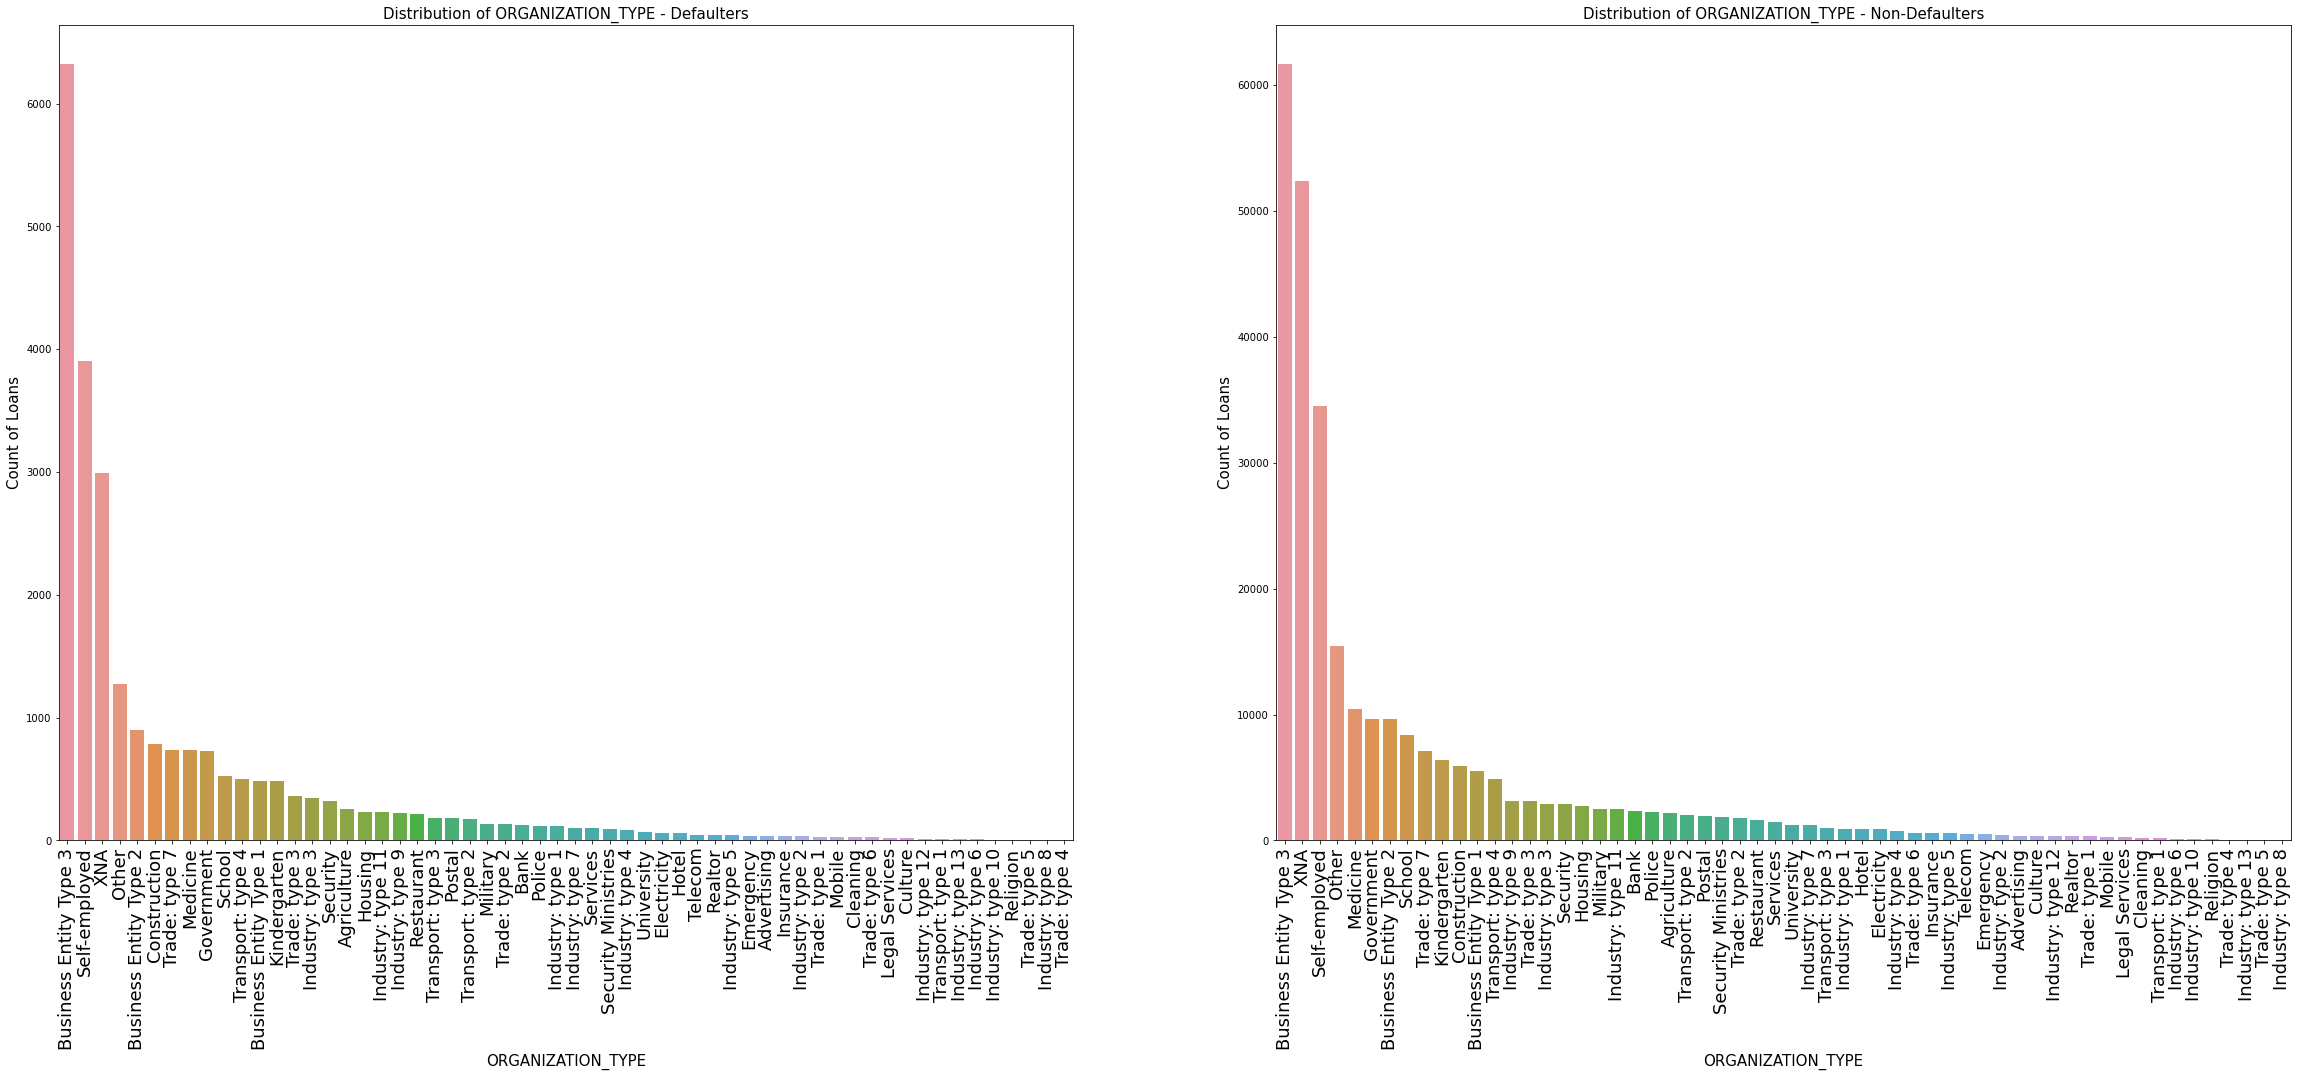

In [113]:
biplot_orgtype(df, 'ORGANIZATION_TYPE', True)

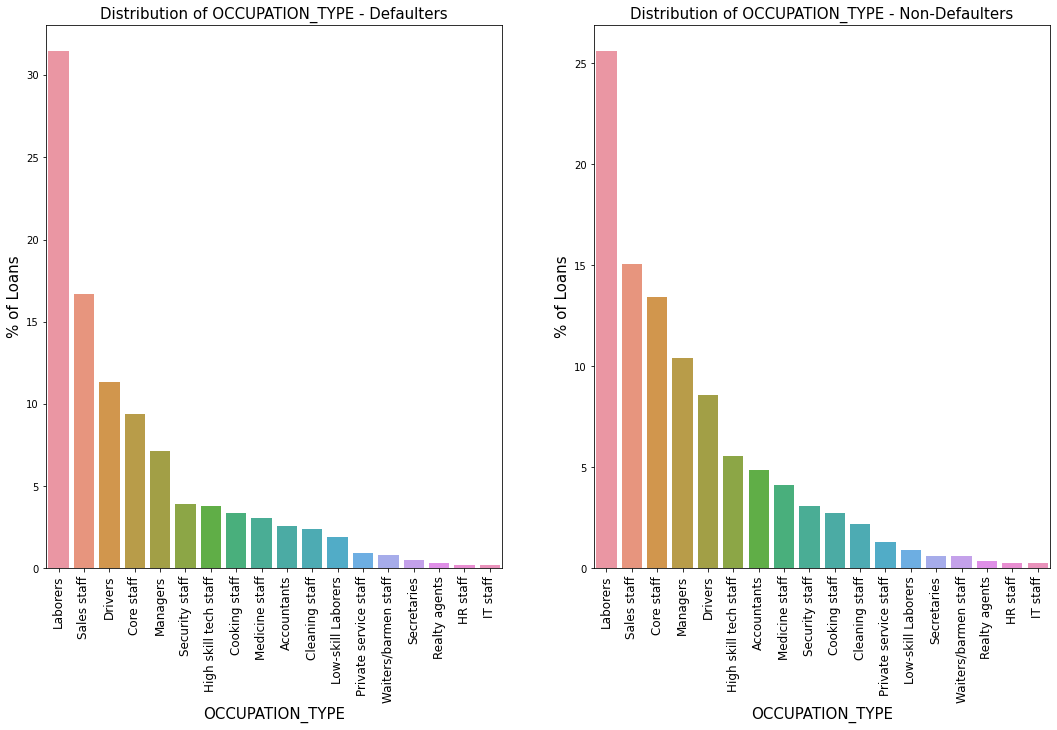

In [114]:
biplot(df, 'OCCUPATION_TYPE', True)

In [115]:
df['AMT_INCOME_TOTAL'].describe()

count    3.075090e+05
mean     1.687386e+05
std      2.371766e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [116]:
defaulters.loc[:,'INCOME_BRACKET']=pd.qcut(df.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.10,0.35,0.50,0.90,1], labels=['Very_low','Low','Medium','High','Very_high'])
nondefaulters.loc[:,'INCOME_BRACKET']=pd.qcut(df.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.10,0.35,0.50,0.90,1], labels=['Very_low','Low','Medium','High','Very_high'])

C:\Users\surya\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\surya\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\surya\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

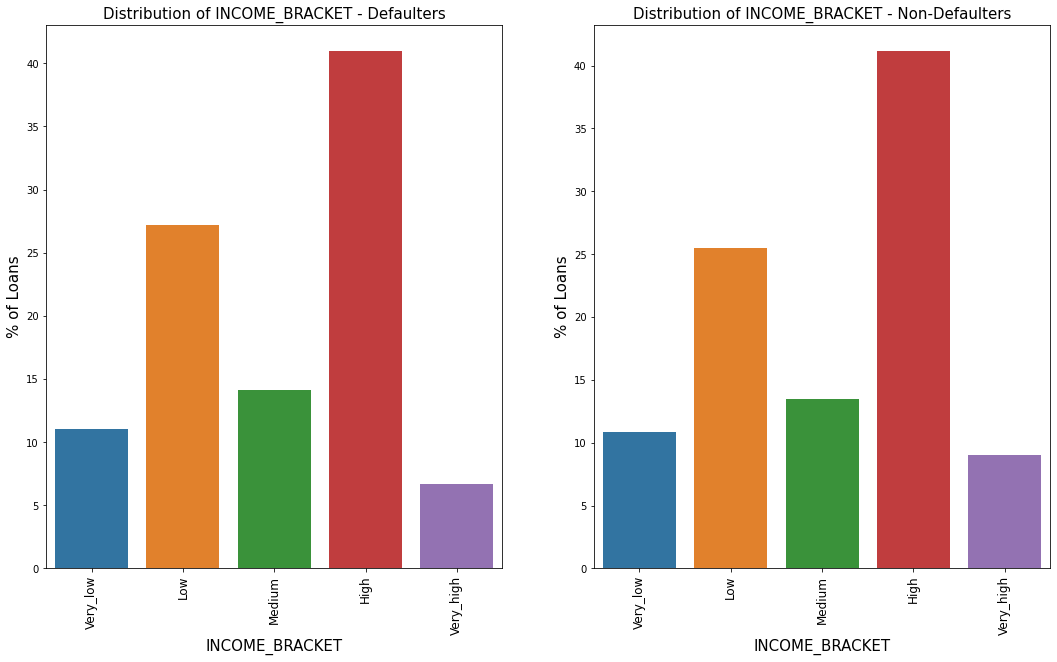

In [117]:
biplot(df, 'INCOME_BRACKET', True)